# Brief Introduction to R and Descriptive Analysis of the Dataset

In this document, we will briefly introduce R and installing all the required packages for this course. A descriptive analysis of the dataset is then operated.

## Installing the required packages

The following commands will load the package if they are already installed. If they are not yet installed, they will be installed and loaded afterwards. Note that for Windows users, Rtools is required for some packages (e.g., CASdatasets). This list may not be exhaustive and other packages may be required in other notebooks.

In [93]:
if (!require("xts")) install.packages("xts")
if (!require("CASdatasets")) install.packages("CASdatasets", repos = "http://cas.uqam.ca/pub/", type="source")
if (!require("caret")) install.packages("caret")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("mgcv")) install.packages("mgcv")
if (!require("dplyr")) install.packages("dplyr")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("visreg")) install.packages("visreg")
if (!require("MASS")) install.packages("MASS")
if (!require("plotrix")) install.packages("plotrix")
if (!require("rgeos")) install.packages("rgeos", type="source")
if (!require("rgdal")) install.packages("rgdal", type="source")
if (!require("xtable")) install.packages("xtable")
if (!require("maptools")) install.packages("maptools")
if (!require("scales")) install.packages("scales")
if (!require("broom")) install.packages("broom")
if (!require("stringi")) install.packages("stringi")


require("CASdatasets")
require("ggplot2")
require("mgcv")
require("caret")
require("gridExtra")
require("dplyr")
require("visreg")
require("MASS")
require("plotrix")
require("rgdal")
require("rgeos")
require("xtable")
require("maptools")
require("scales")
require("broom")
require("stringi");

In this jupyter notebook, we will use the following options to set the width and height of our plots.

In [94]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 250)

## Getting started with the dataset
### Loading the dataset

We will now load a dataset from the **CASdatasets** package. In case you were not able to install the **CASdatasets** package, we also provide an RDS file of the dataset (see more on that below).

We can simply load the dataset with the following command:

In [95]:
data("freMTPLfreq")

To keep it simple and illustrative, we will only keep a subset of this dataset. Each line corresponds to a policy. We will restrict ourself to the policies covering a vehicle aged between 0 and 25 years. Also, we will only keep policies that were covered for a maximum of one year.

We will use the **tidyverse** univers in this course, as it can be easier to read (and making clear code is important!). Subsetting can be done with the **filter** function.

In [96]:
dataset = freMTPLfreq %>% filter(Exposure<=1 & Exposure >= 0 & CarAge<=25)

Note the *pipe* operator which allows to chain operations. We could also have written the following. We check that we obtain the same result with the **all.equal(dataset, dataset_alternative)** function. To save some memory we then remove the alternative dataset.

In [97]:
dataset_alternative = freMTPLfreq %>% 
                                filter(Exposure <= 1) %>% 
                                filter(Exposure >= 0) %>% 
                                filter(CarAge<=25)

sprintf("Are the two datasets equal ? %s", ifelse(all.equal(dataset, dataset_alternative), "Yes", "No"))
rm(dataset_alternative)

[1] "Are the two datasets equal ? Yes"

We will save the dataset into an *RDS* file, so we don't need to load the CASdatasets package anymore and filter the data.

In [98]:
saveRDS(dataset, file="../data/dataset.Rds")

For those that could not install this package, now is the time to load the provided *RDS* file.

In [99]:
dataset = readRDS(file = "../data/dataset.Rds")

### Checking the dataset

We can check that the dataset is correctly loaded with the following functions.A good idea is to check whether the dataset has been loaded correctly. To do this, the following tools can be used:

 - **head** allows to visualize the first 6 lines of the dataset.

In [100]:
head(dataset)

,PolicyID,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density
,<fct>,<int>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>
1,1,0,0.09,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,2,0,0.84,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
3,3,0,0.52,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,4,0,0.45,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
5,5,0,0.15,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60
6,6,0,0.75,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60


- **str** allows to see the format of the different variables. We will typically distinguish numerical variables (real numbers or integers) and factors (categorical data).

In [101]:
str(dataset)

'data.frame':	410864 obs. of  10 variables:
 $ PolicyID : Factor w/ 413169 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ClaimNb  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Exposure : num  0.09 0.84 0.52 0.45 0.15 0.75 0.81 0.05 0.76 0.34 ...
 $ Power    : Factor w/ 12 levels "d","e","f","g",..: 4 4 3 3 4 4 1 1 1 6 ...
 $ CarAge   : int  0 0 2 2 0 0 1 0 9 0 ...
 $ DriverAge: int  46 46 38 38 41 41 27 27 23 44 ...
 $ Brand    : Factor w/ 7 levels "Fiat","Japanese (except Nissan) or Korean",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ Gas      : Factor w/ 2 levels "Diesel","Regular": 1 1 2 2 1 1 2 2 2 2 ...
 $ Region   : Factor w/ 10 levels "Aquitaine","Basse-Normandie",..: 1 1 8 8 9 9 1 1 8 6 ...
 $ Density  : int  76 76 3003 3003 60 60 695 695 7887 27000 ...


- **summary** allows to compute for each variable some summary statistics.

In [102]:
summary(dataset)

    PolicyID         ClaimNb           Exposure            Power      
 1      :     1   Min.   :0.00000   Min.   :0.002732   f      :95432  
 2      :     1   1st Qu.:0.00000   1st Qu.:0.200000   g      :90663  
 3      :     1   Median :0.00000   Median :0.530000   e      :76784  
 4      :     1   Mean   :0.03925   Mean   :0.559997   d      :67660  
 5      :     1   3rd Qu.:0.00000   3rd Qu.:1.000000   h      :26558  
 6      :     1   Max.   :4.00000   Max.   :1.000000   j      :17978  
 (Other):410858                                        (Other):35789  
     CarAge         DriverAge                                   Brand       
 Min.   : 0.000   Min.   :18.0   Fiat                              : 16653  
 1st Qu.: 3.000   1st Qu.:34.0   Japanese (except Nissan) or Korean: 79031  
 Median : 7.000   Median :44.0   Mercedes, Chrysler or BMW         : 19087  
 Mean   : 7.413   Mean   :45.3   Opel, General Motors or Ford      : 37287  
 3rd Qu.:12.000   3rd Qu.:54.0   other         

If one needs some **help** on a function, typing a question mark and the name of the function in the console opens the help file of the function. For instance,

In [103]:
?head

## Descriptive Analysis of the dataset

We will now proceed with a descriptive analysis of this dataset. We will now have a descriptive analysis of the portfolio. The different variables available are

In [104]:
names(dataset)

[1] "PolicyID"  "ClaimNb"   "Exposure"  "Power"     "CarAge"    "DriverAge"
 [7] "Brand"     "Gas"       "Region"    "Density"

### PolicyID
The variable *PolicyID* related to a unique identifier of the policy. We can check that every policy appears only once in the dataset

In [105]:
length(unique(dataset$PolicyID)) == nrow(dataset)

[1] TRUE

Another possibility is to check the frequency of each *PolicyID* using the function *table*. The result is a table that shows for each *PolicyID* the corresponding number of lines in the dataset. We can then use a second time the function *table* in this result to show the frequency. We expect to have only **ones** (with possibily zeros), meaning each *PolicyID* has a unique line.

In [106]:
table(table(dataset$PolicyID))


     0      1 
  2305 410864 

**To what corresponds the 0 ?** 

It appears that in this dataset the variable *PolicyID* is a **factor**. A factor variable has different *levels*. It appears that some PolicyID may be missing here (removed from the dataset, probably when we filtered out some policies). It is as if we had a 3-level categorical variable, for instance, color of a car, which takes three possible values: red, blue, gray, but in our dataset, we would only have red and blue cars. Gray would still be a level, but with no observation (i.e. no row) corresponding to a gray car.

To remove unused levels, we can use on the function **droplevels**.

### Exposure in month
The Exposure reveals the fraction of the year during which the policyholder is in the portfolio. 
We can compute the total exposure by summing the policyholders' exposures. 
Here we find:

In [107]:
sprintf("%s years",scales::number(sum(dataset$Exposure), accuracy = 0.1))

[1] "230 082.6 years"

We can show the number of months of exposure on a table. The function *cut* allows to categorize (bin) a numerical variable. We can specify where to 'break' and give a name to each level using the *labels* argument. The output is a factor variable.

In [108]:
table_exposures = table(cut(dataset$Exposure, breaks = seq(from = 0, to = 1,by = 1/12), labels = 1:12))
table_exposures


     1      2      3      4      5      6      7      8      9     10     11 
 62633  29216  33452  24213  19463  29565  18835  14438  21518  13653  12422 
    12 
131456 

Using the function *prop.table*, it is possible to represent this information in relative terms show the number of months of exposure on a table.

In [109]:
Exposures_prop = prop.table(table_exposures)
round(Exposures_prop, 4)*100


    1     2     3     4     5     6     7     8     9    10    11    12 
15.24  7.11  8.14  5.89  4.74  7.20  4.58  3.51  5.24  3.32  3.02 32.00 

Alternatively, we can use a barplot, using **ggplot2** !

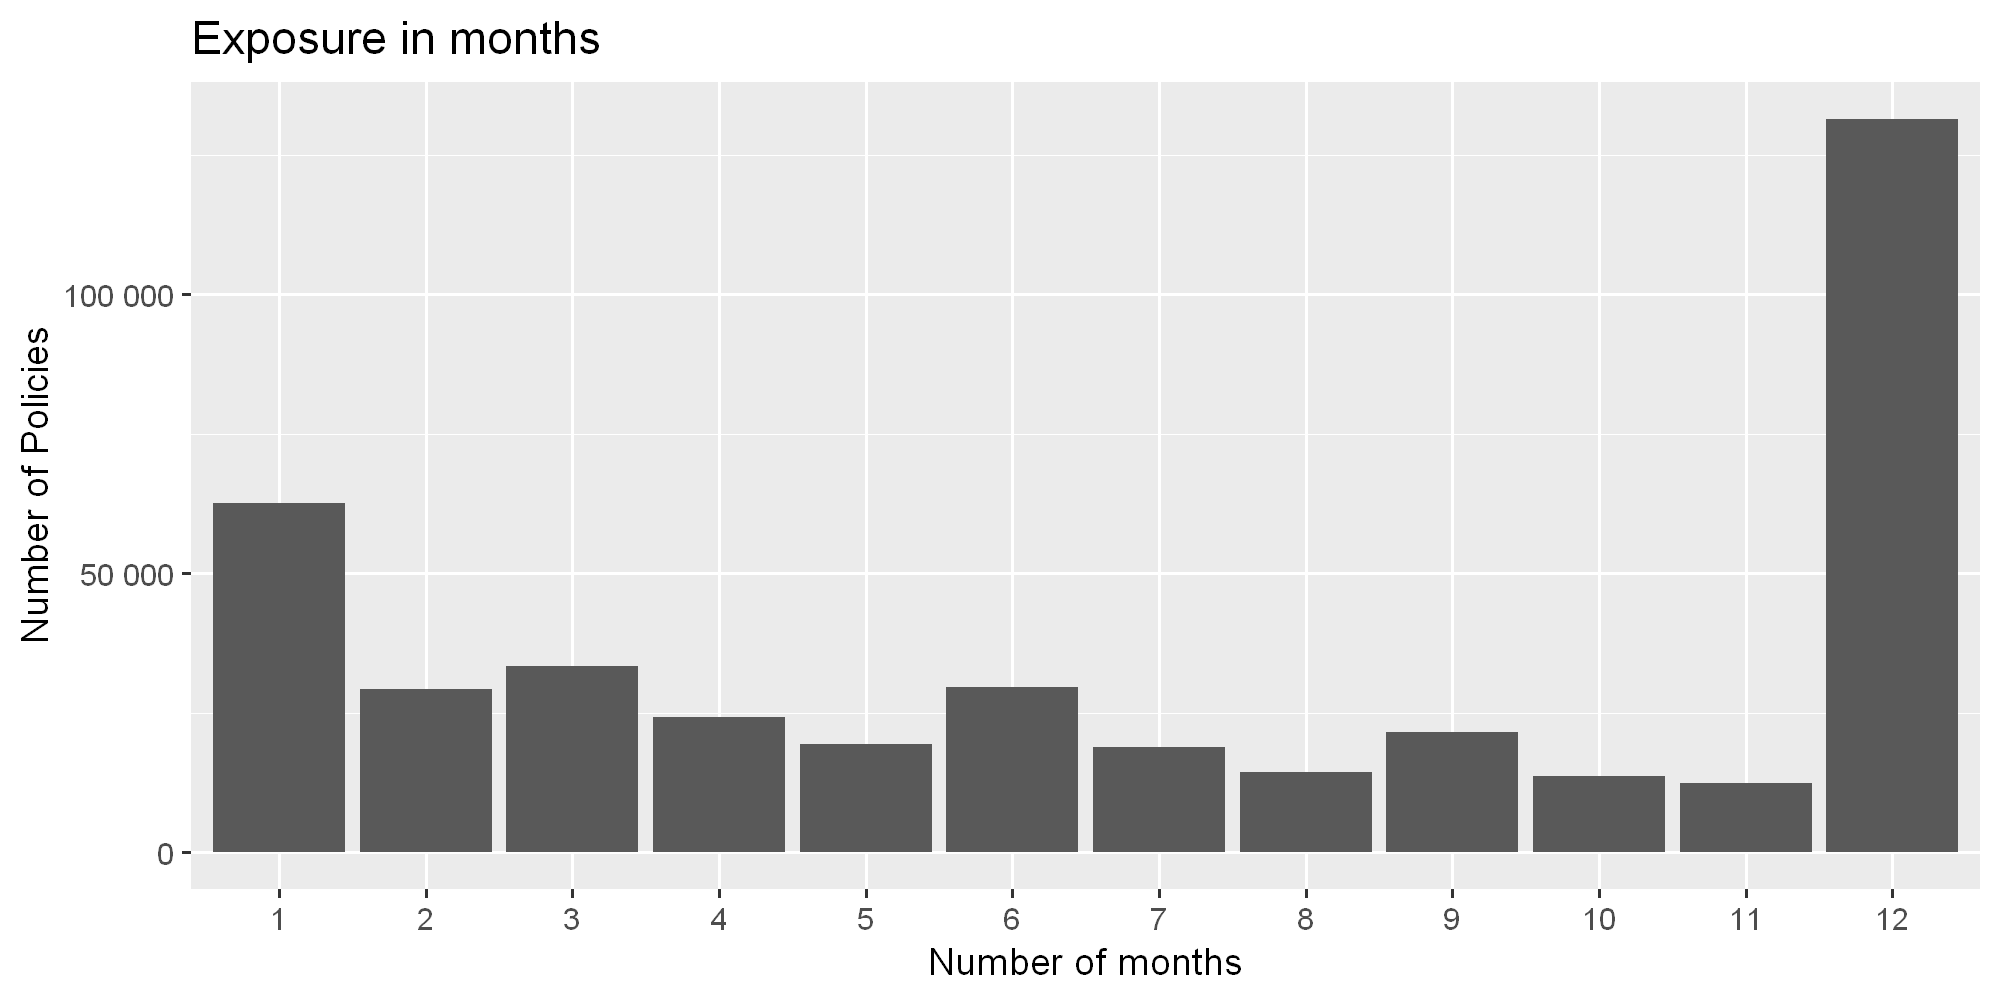

In [110]:
ggplot(dataset)+geom_bar(aes(x=cut(Exposure,
                                   breaks = seq(from = 0, to = 1,by = 1/12), labels = 1:12))) + 
  scale_x_discrete(name = "Number of months") + 
  scale_y_continuous(name = "Number of Policies", label = label_number()) + 
  ggtitle("Exposure in months")

What if we also want to show the percentage on the bars ?

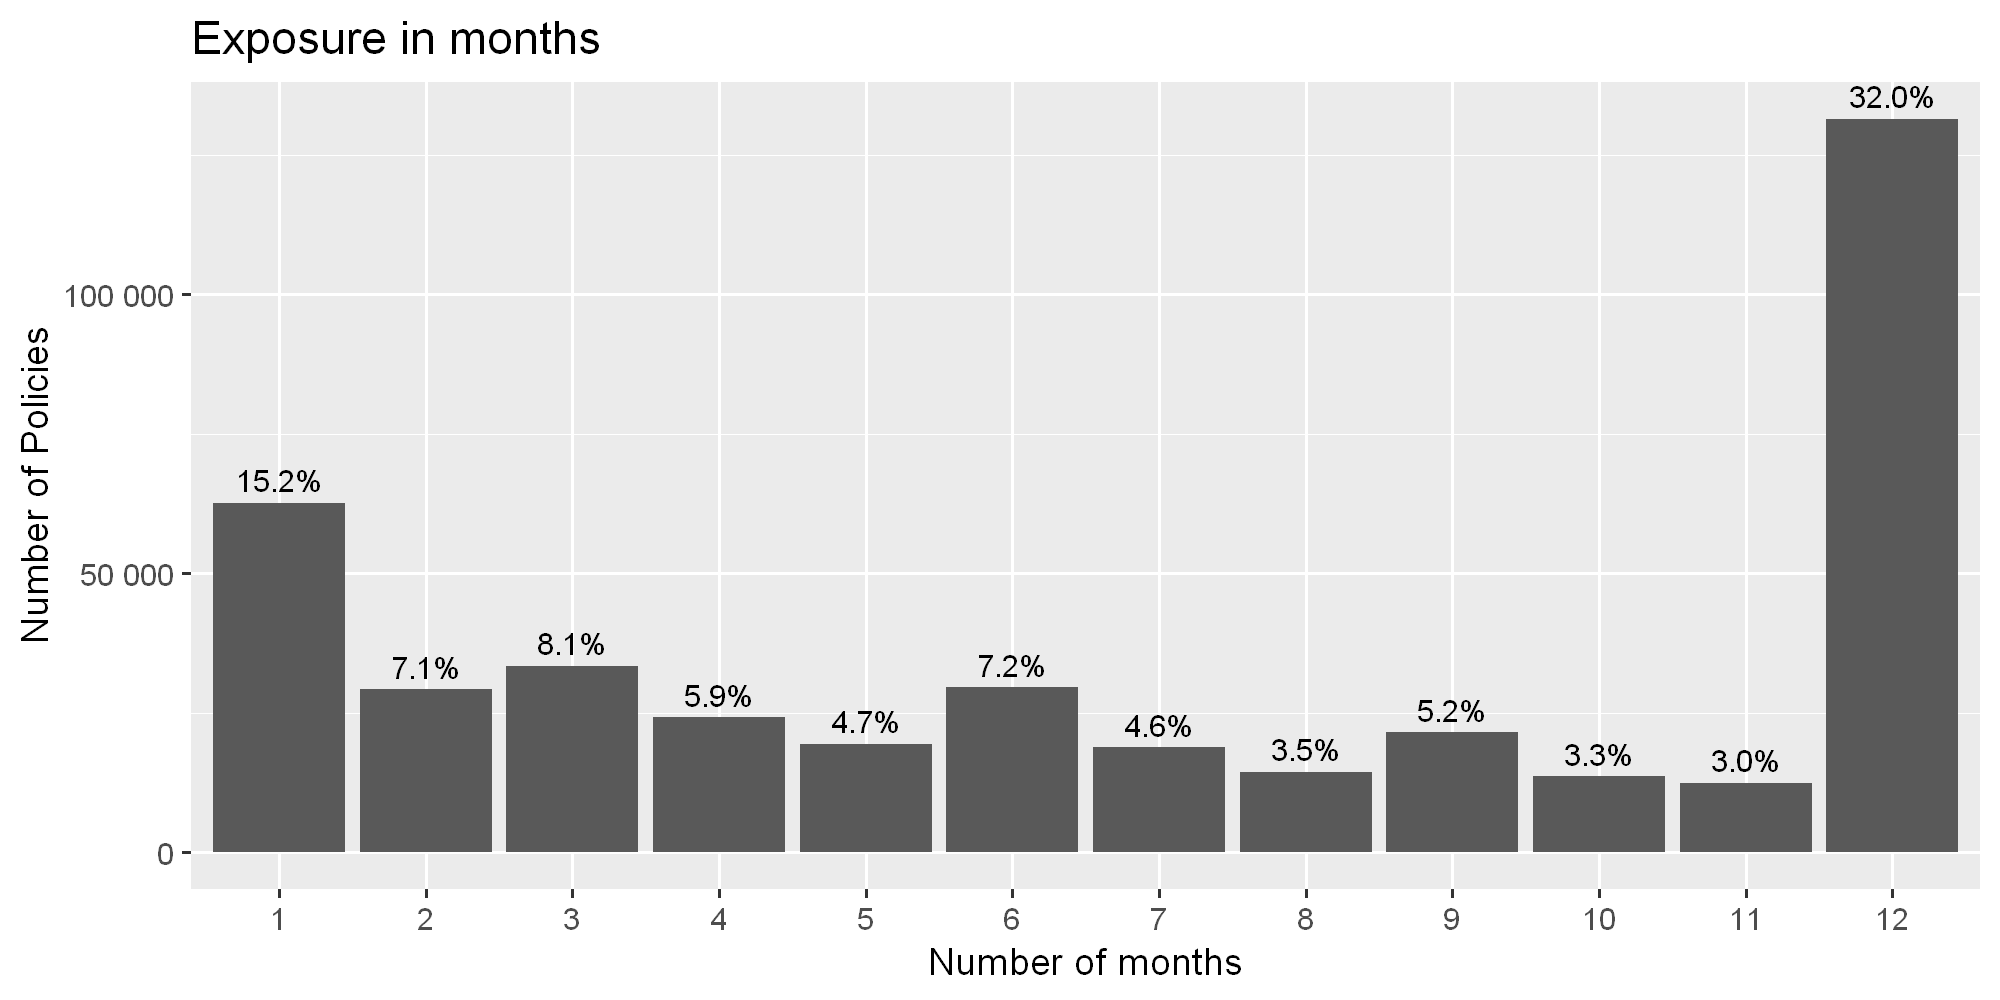

In [111]:
ggplot(dataset, aes(x=cut(Exposure, breaks = seq(from = 0, to = 1,by = 1/12), labels = 1:12), 
                    label = scales::percent(prop.table(stat(count)), accuracy = 0.1)))+
  geom_bar() + 
  geom_text(stat = 'count',
            vjust = -0.5,
            size = 3) +
  scale_x_discrete(name = "Number of months") + 
  scale_y_continuous(name = "Number of Policies", 
                     label = label_number()) + 
  ggtitle("Exposure in months")

Note that a barplot is used to plot factor variables (categorical variables). In our case, we categorized the variable Exposure using the function *cut*. If we do not want to categorize this variable, we should use a histogram. We can specify the number of bins (= 12) or the binwidth (= 1/12).

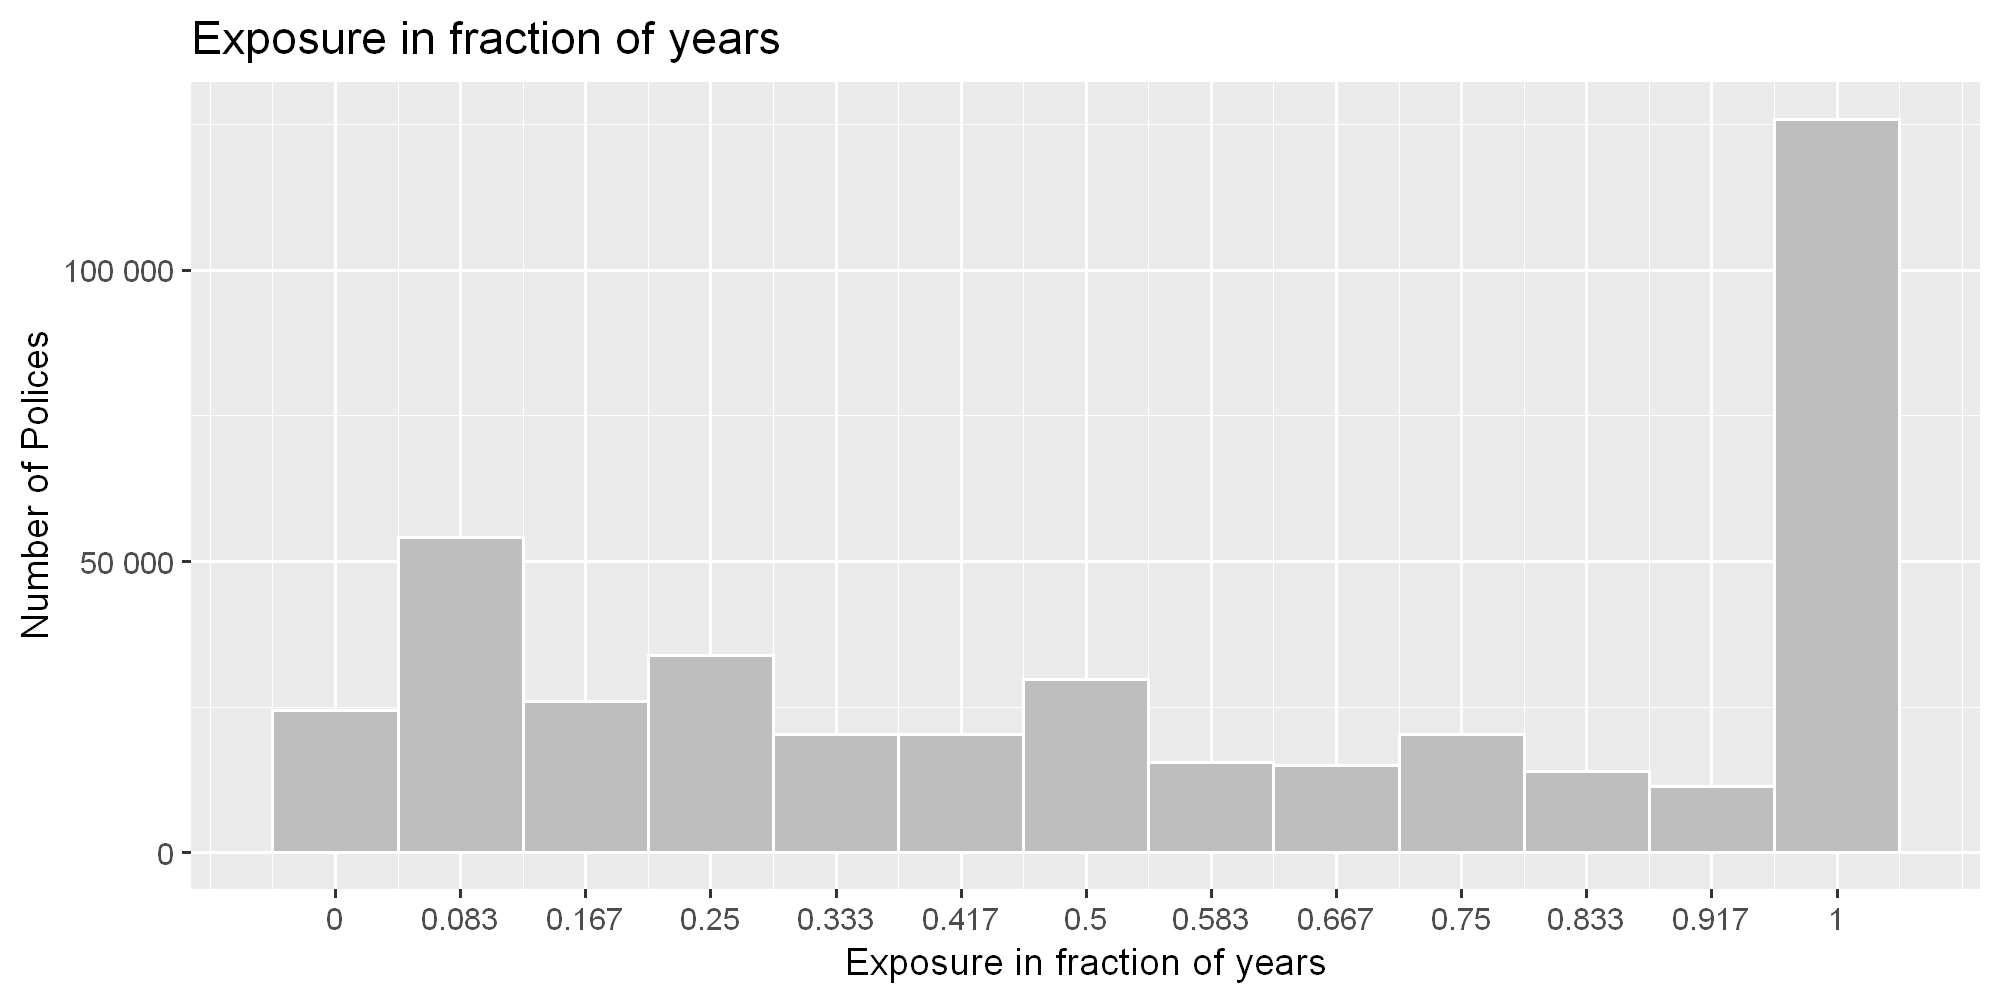

In [112]:
ggplot(dataset, aes(x=Exposure))+geom_histogram(binwidth =1/12, fill='gray', color='white') +
  scale_x_continuous(name = "Exposure in fraction of years", breaks=seq(0,1,1/12), labels = round(seq(0,1,1/12), 3))+
  scale_y_continuous(name = 'Number of Polices', labels = label_number()) + 
  ggtitle("Exposure in fraction of years")

If you are not familiar with ggplot, I could recommend this cheat-sheet: https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf

### Number of claim : ClaimNb


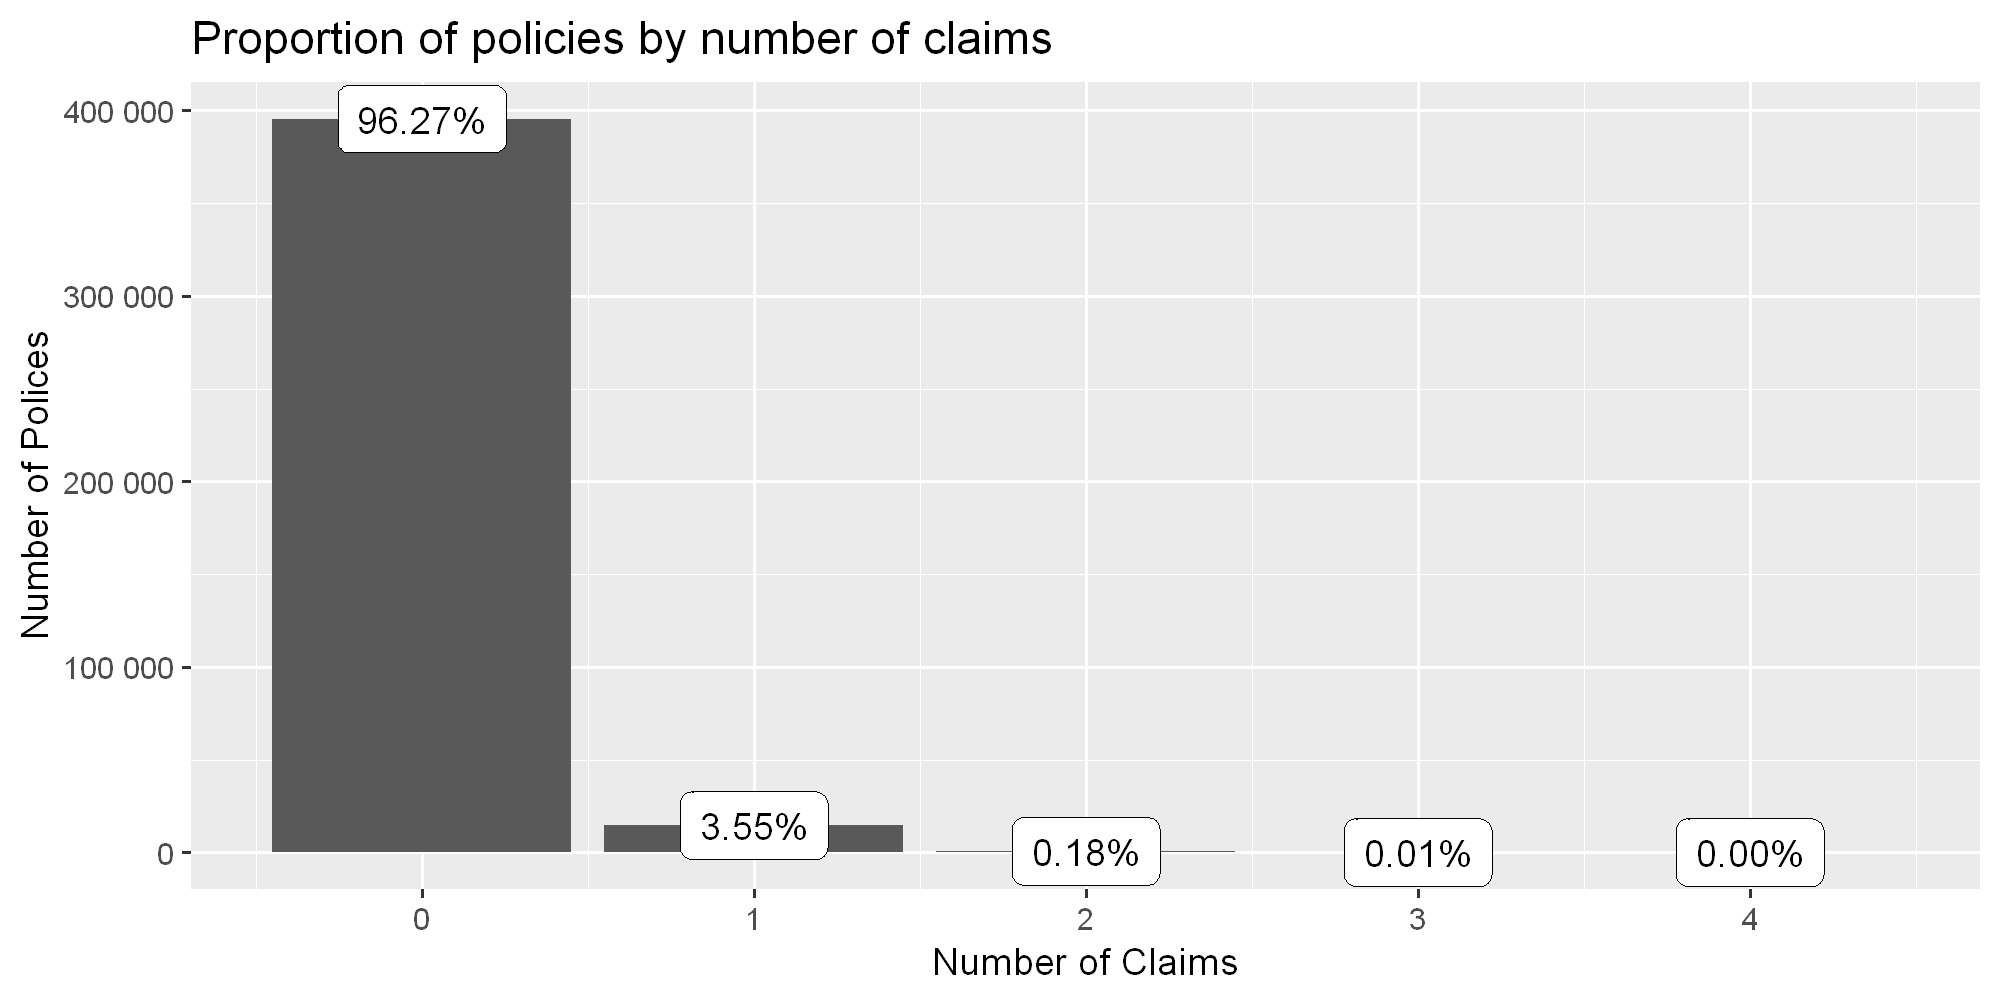

In [113]:
ggplot(dataset, aes(x=ClaimNb))+
  geom_bar()+
  geom_label(stat='count', 
             aes(label =  percent(prop.table(after_stat(count)), 
                                     accuracy = 0.01)),
             vjust = 0.5)+
  scale_x_continuous(name = "Number of Claims")+
  scale_y_continuous(name = "Number of Polices", 
                     labels = label_number())+
  ggtitle("Proportion of policies by number of claims")

We can compute the average claim frequency in this portfolio, taking into account the different exposures.

In [114]:
scales::percent(sum(dataset$ClaimNb) / sum(dataset$Exposure), accuracy = 0.01)

[1] "7.01%"

Let us now look at the other variables.

### Power

The variable **Power** is a categorized variable, related to the power of the car. The levels of the variable are ordered categorically.
We can see the different **levels** of a **factor** by using the function *level* in R:

In [115]:
levels(dataset$Power)

[1] "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o"

In [116]:
table(dataset$Power)


    d     e     f     g     h     i     j     k     l     m     n     o 
67660 76784 95432 90663 26558 17398 17978  9270  4593  1758  1276  1494 

Remember however, that in insurance, exposures may differ from one policyholder to another. Hence, the table above, does NOT measure the exposure in each level of the variable *Power*. We can use the functions *group_by* and *summarise* from package **dplyr** to give us the exposure in each level of the variable.

Check out the cheatsheet https://github.com/rstudio/cheatsheets/blob/main/data-transformation.pdf

In [117]:
Power.summary = dataset %>% group_by(Power) %>% summarise(totalExposure = sum(Exposure),
                                                          Number.Observations = length(Exposure))
Power.summary

Power,totalExposure,Number.Observations
<fct>,<dbl>,<int>
d,37570.7285,67660
e,44436.0602,76784
f,55652.4991,95432
g,51296.7035,90663
h,13800.4918,26558
i,9244.0486,17398
j,9227.6339,17978
k,4493.4967,9270
l,2134.1550,4593


We can show this on a plot as well:

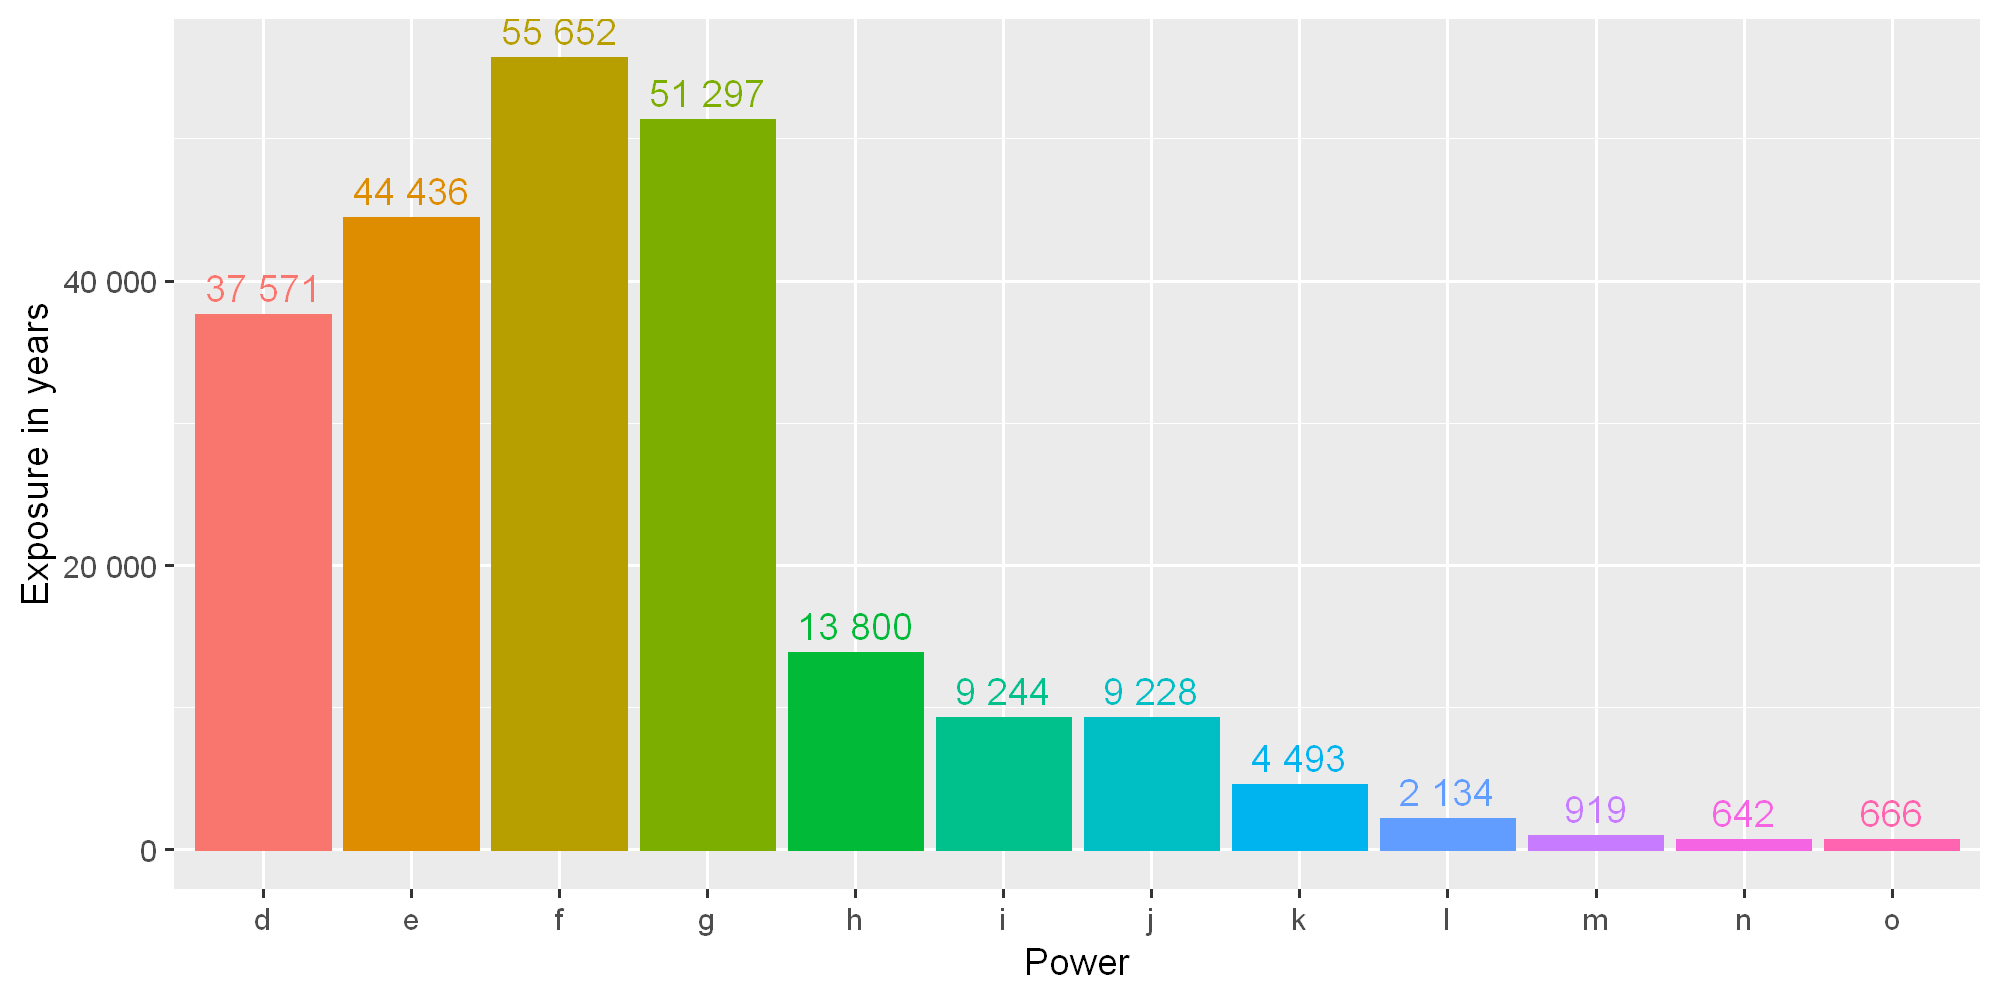

In [118]:
ggplot(Power.summary, aes(x=Power, 
                          y=totalExposure, 
                          fill=Power, 
                          color=Power, 
                          label=scales::number(totalExposure))) + 
  geom_bar(stat="identity")+
  geom_text(stat='identity',  vjust=-0.5)+
  scale_y_continuous(name = "Exposure in years", labels = scales::number)+
  scale_colour_discrete(guide = "none")+
  scale_fill_discrete(guide="none")

Let us now look at the observed claim frequency in each level

In [119]:
Power.summary = dataset %>% group_by(Power) %>% summarise(totalExposure = sum(Exposure),
                                                          Number.Observations = length(Exposure),
                                                          Number.Claims = sum(ClaimNb),
                                                          Obs.Claim.Frequency = sum(ClaimNb)/sum(Exposure))
Power.summary

Power,totalExposure,Number.Observations,Number.Claims,Obs.Claim.Frequency
<fct>,<dbl>,<int>,<int>,<dbl>
d,37570.7285,67660,2350,0.06254869
e,44436.0602,76784,3198,0.07196858
f,55652.4991,95432,3986,0.07162302
g,51296.7035,90663,3450,0.06725578
h,13800.4918,26558,998,0.07231626
i,9244.0486,17398,715,0.07734706
j,9227.6339,17978,710,0.07694280
k,4493.4967,9270,375,0.08345394
l,2134.1550,4593,162,0.07590826


We can compute the ratio to the portfolio claim frequency and plot the claim frequencies.

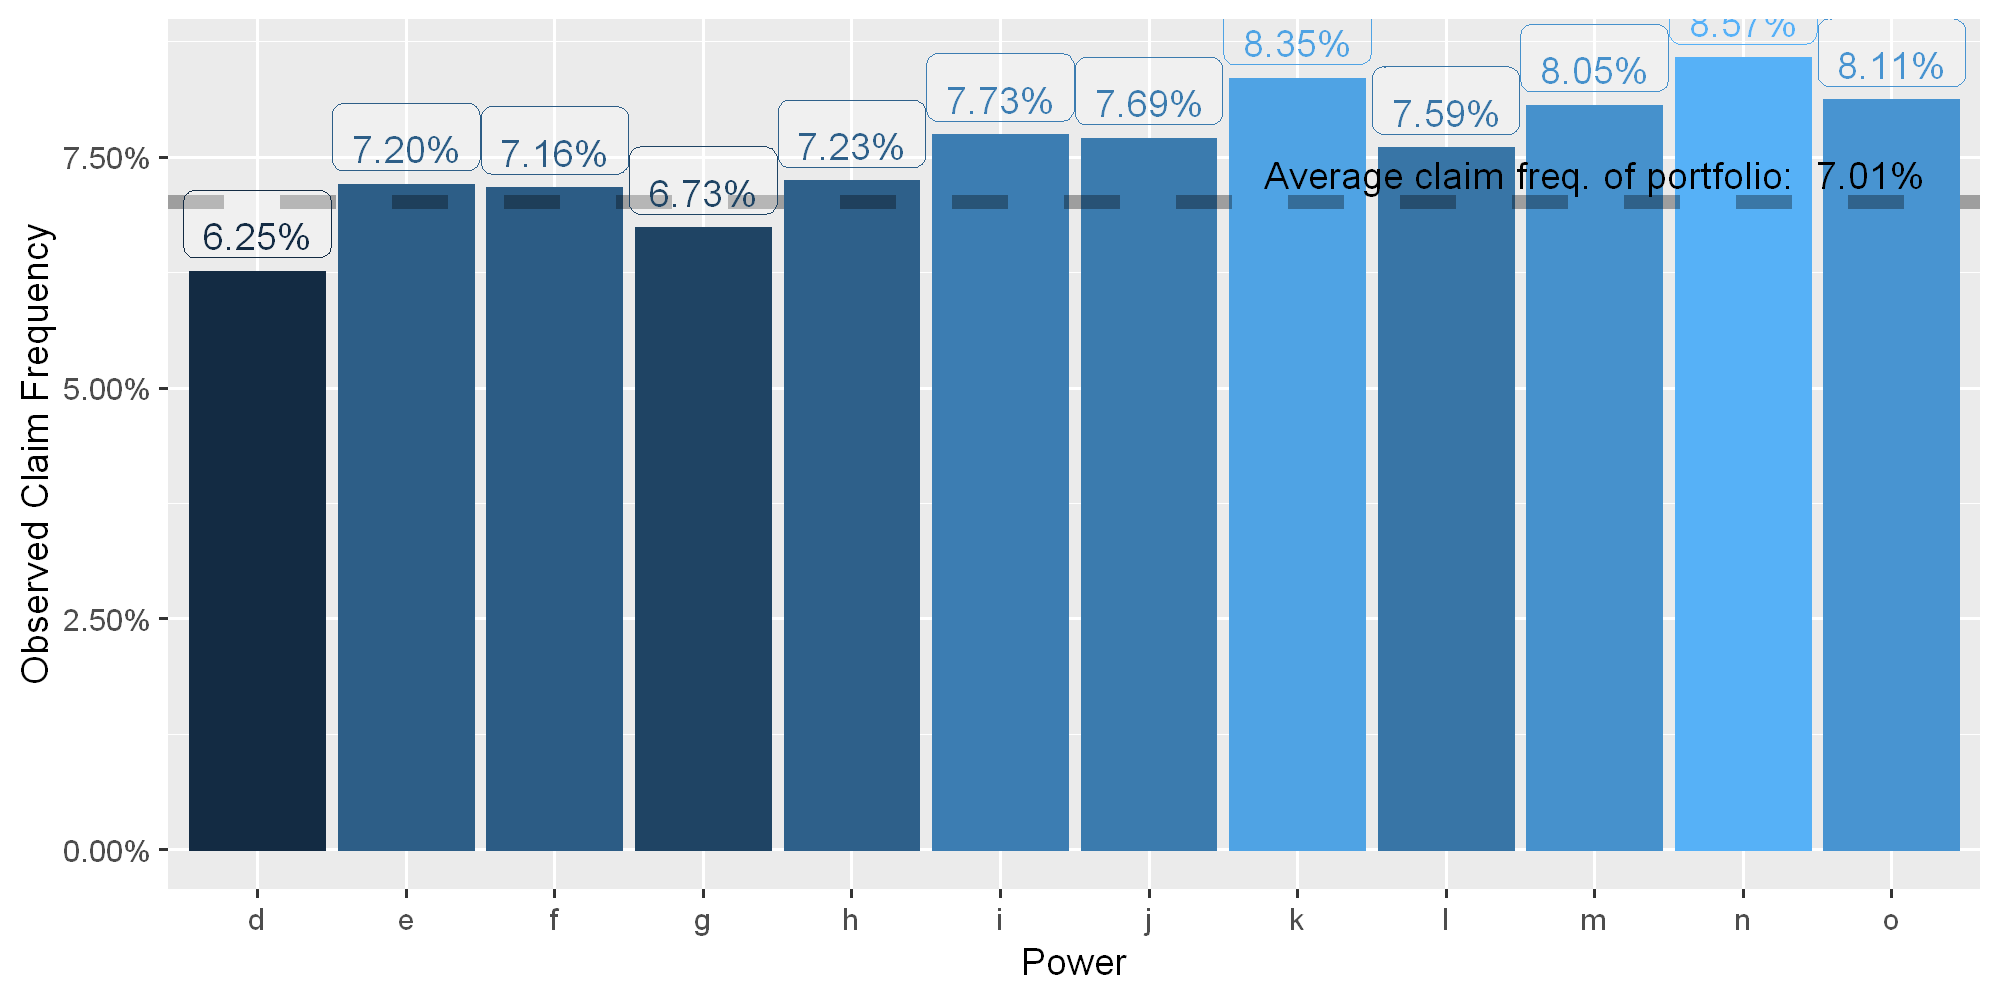

In [120]:
portfolio.cf = sum(dataset$ClaimNb)/ sum(dataset$Exposure)
# Can also be written as
portfolio.cf = with(dataset, sum(ClaimNb)/sum(Exposure))

ggplot(Power.summary, aes(x=Power, 
                          y=Obs.Claim.Frequency,
                          color=Obs.Claim.Frequency,
                          fill=Obs.Claim.Frequency,
                          label = percent(Obs.Claim.Frequency, accuracy = 0.01))) + 
  geom_bar(stat='identity') + 
  geom_hline(aes(yintercept=portfolio.cf), color="black", size= 2, linetype="dashed", alpha = 0.33) +
  geom_label(vjust=-0.21, fill="white", alpha = 0.25)+
  annotate(geom="text", 
           x='m', y=portfolio.cf, 
           vjust=-0.5, 
           label=paste("Average claim freq. of portfolio: ", percent(portfolio.cf, accuracy = 0.01)), 
           color="black")+
  scale_y_continuous(name = "Observed Claim Frequency", labels = percent_format(accuracy = 0.01))+
  theme(legend.position = 'none')

### CarAge

The vehicle age, in years. This is the first continuous variable that we encounter (although it only takes discrete values).

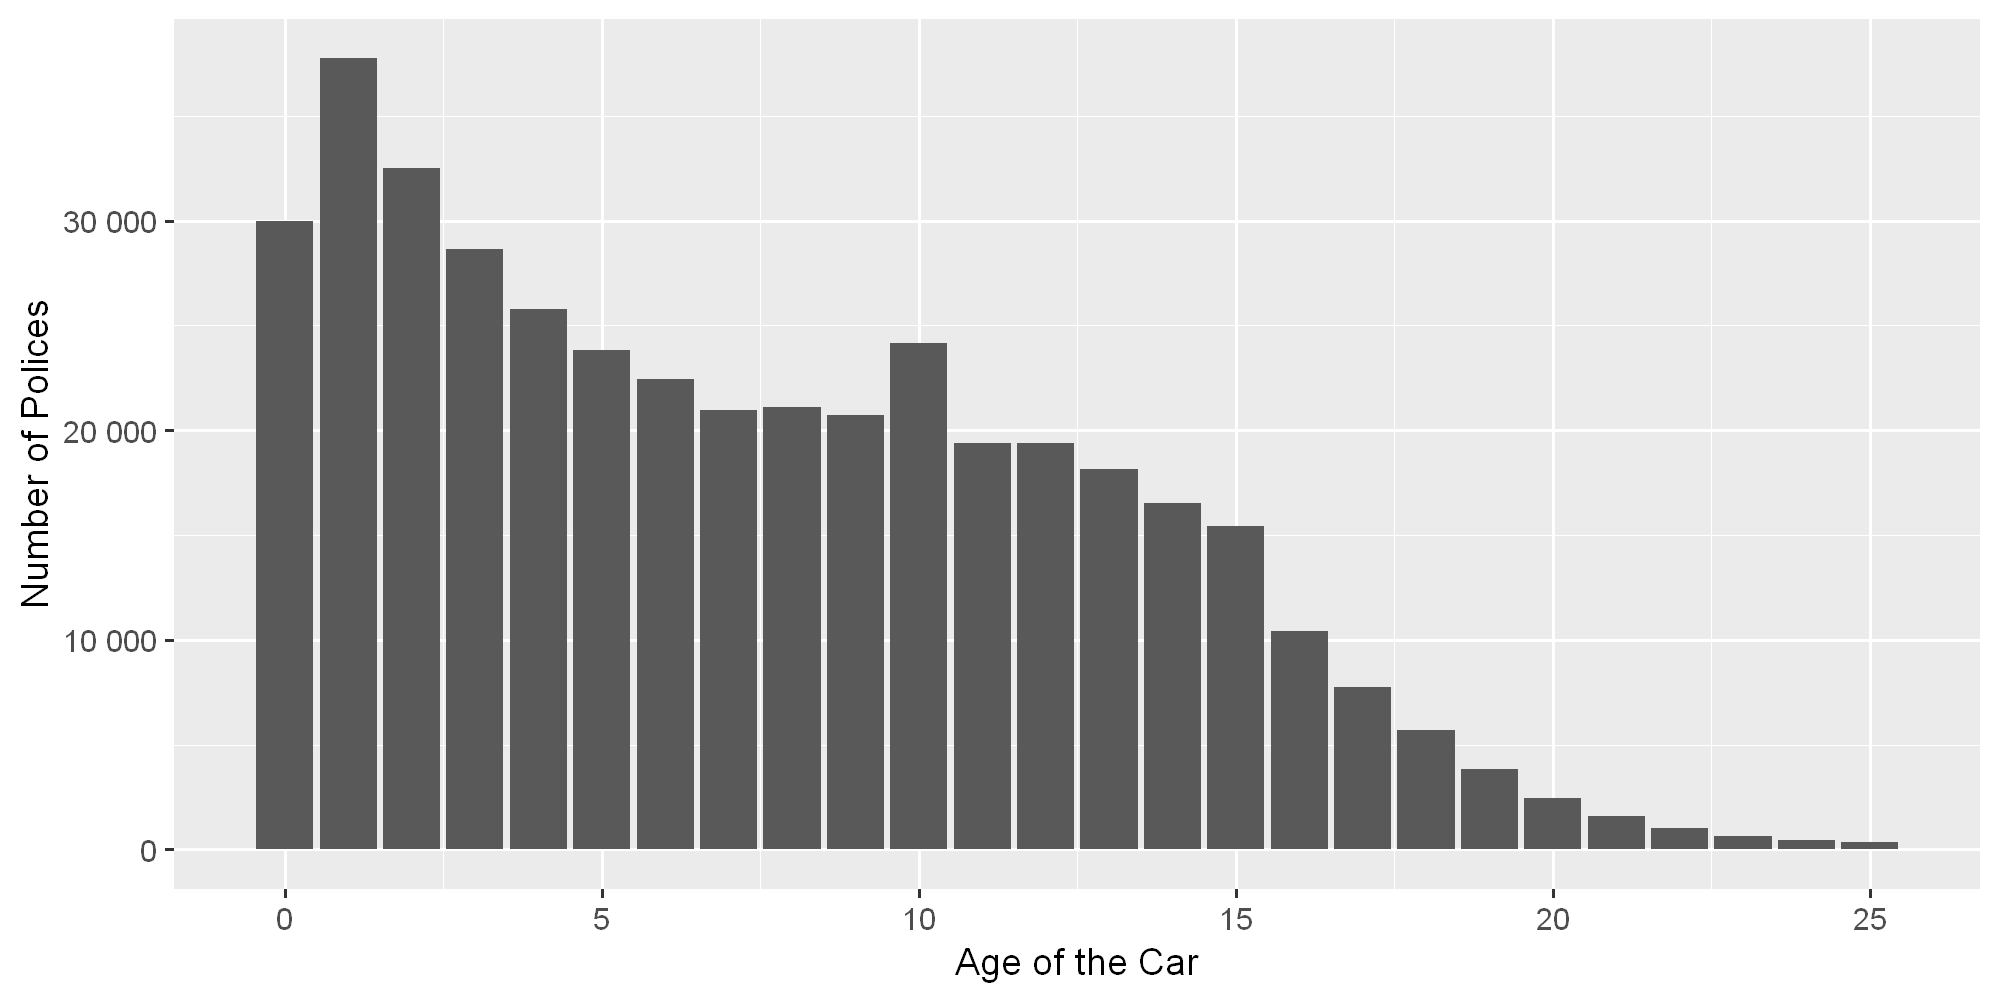

In [121]:
ggplot(dataset, 
       aes(x=CarAge)) + geom_bar()  + 
  scale_x_continuous(name = "Age of the Car", breaks=seq(0,100,5))+
  scale_y_continuous(name = "Number of Polices", labels=label_number())

Alternatively, we can use a histogram, with a binwidth of 1.

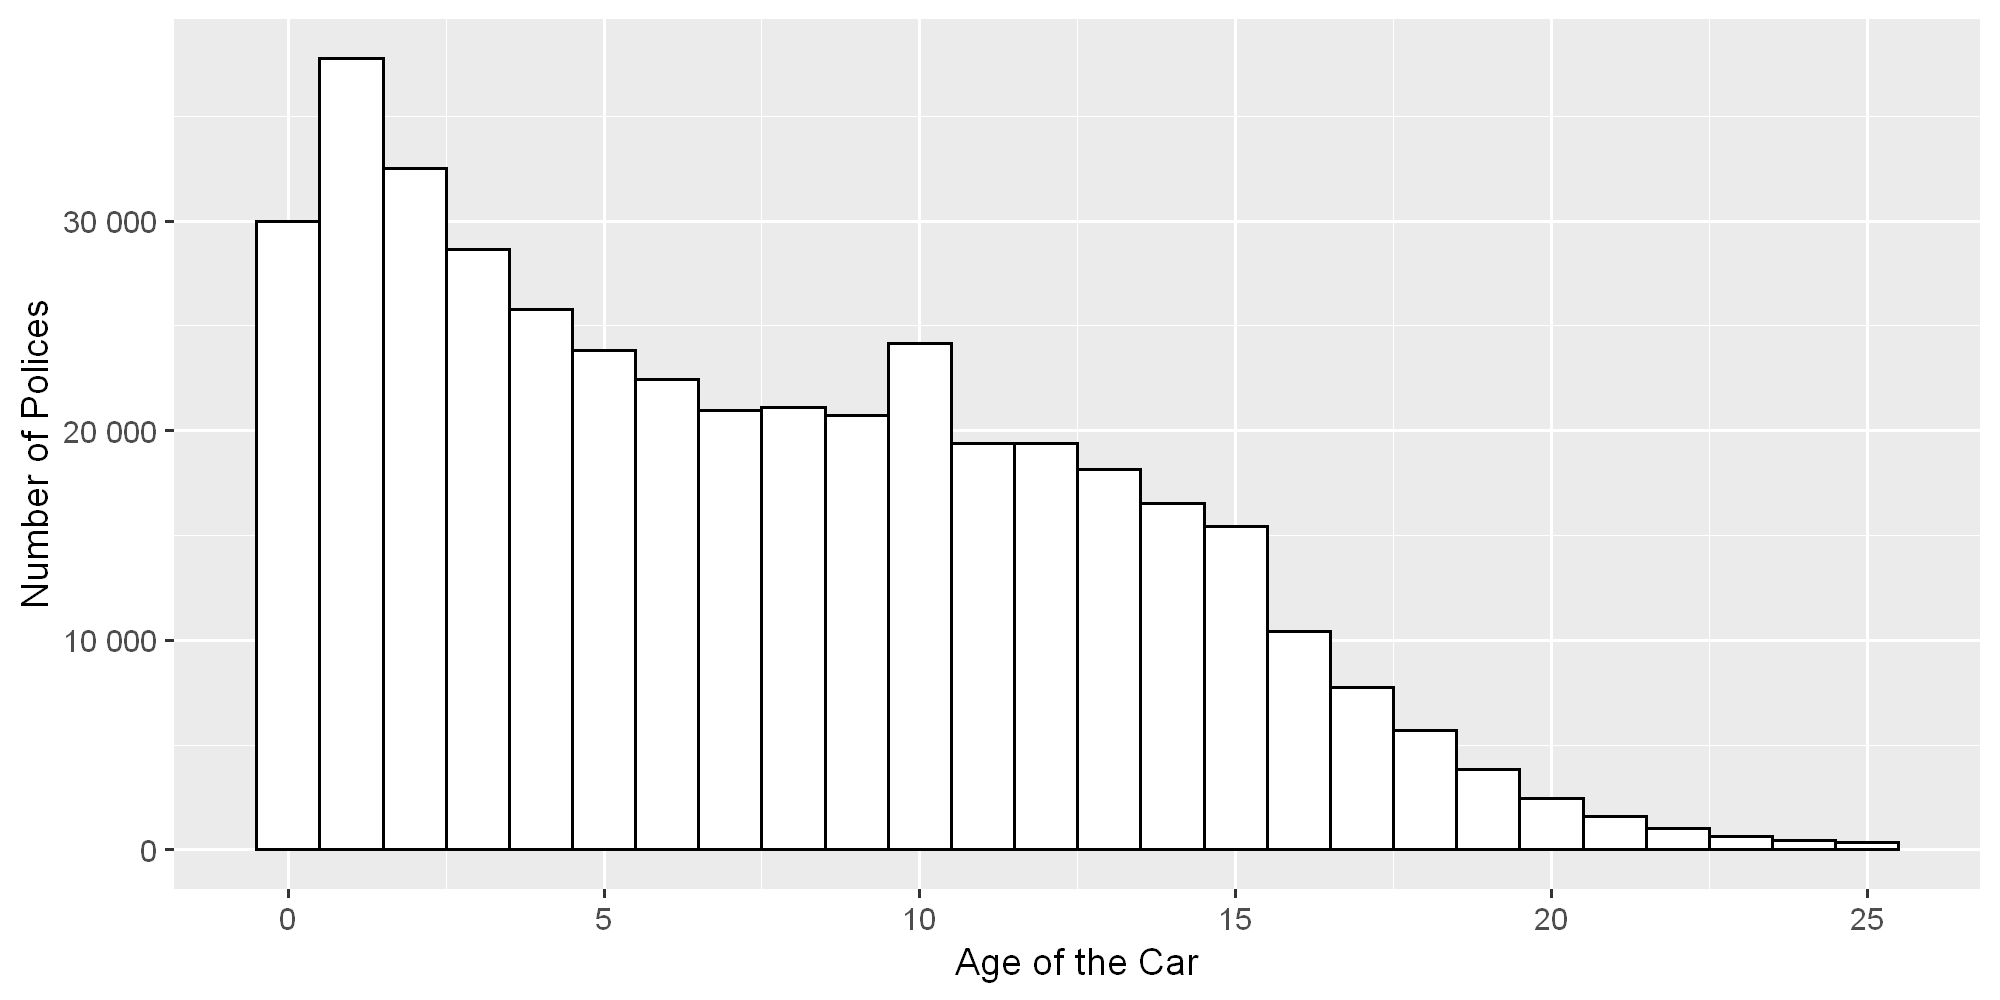

In [122]:
ggplot(dataset, 
       aes(x=CarAge)) + geom_histogram(binwidth = 1, color = 'black', fill='white')  + 
  scale_x_continuous(name = "Age of the Car", breaks=seq(0,100,5))+
  scale_y_continuous(name = "Number of Polices", labels=label_number())

Again, here, the exposures are not considered on the barplot/histogram. We can use **ddply** to correct this.

In [123]:
CarAge.summary = dataset %>% group_by(CarAge) %>% summarise(totalExposure = sum(Exposure),
                                                            Number.Observations = length(Exposure))
CarAge.summary

CarAge,totalExposure,Number.Observations
<int>,<dbl>,<int>
0,8710.9025,29984
1,18137.9287,37749
2,17347.0187,32505
3,15818.4690,28652
4,14966.3336,25761
5,14445.5049,23813
6,13790.1116,22433
7,12909.4805,20960
8,13084.2756,21091


Then, we can plot the data onto a barplot, as before.

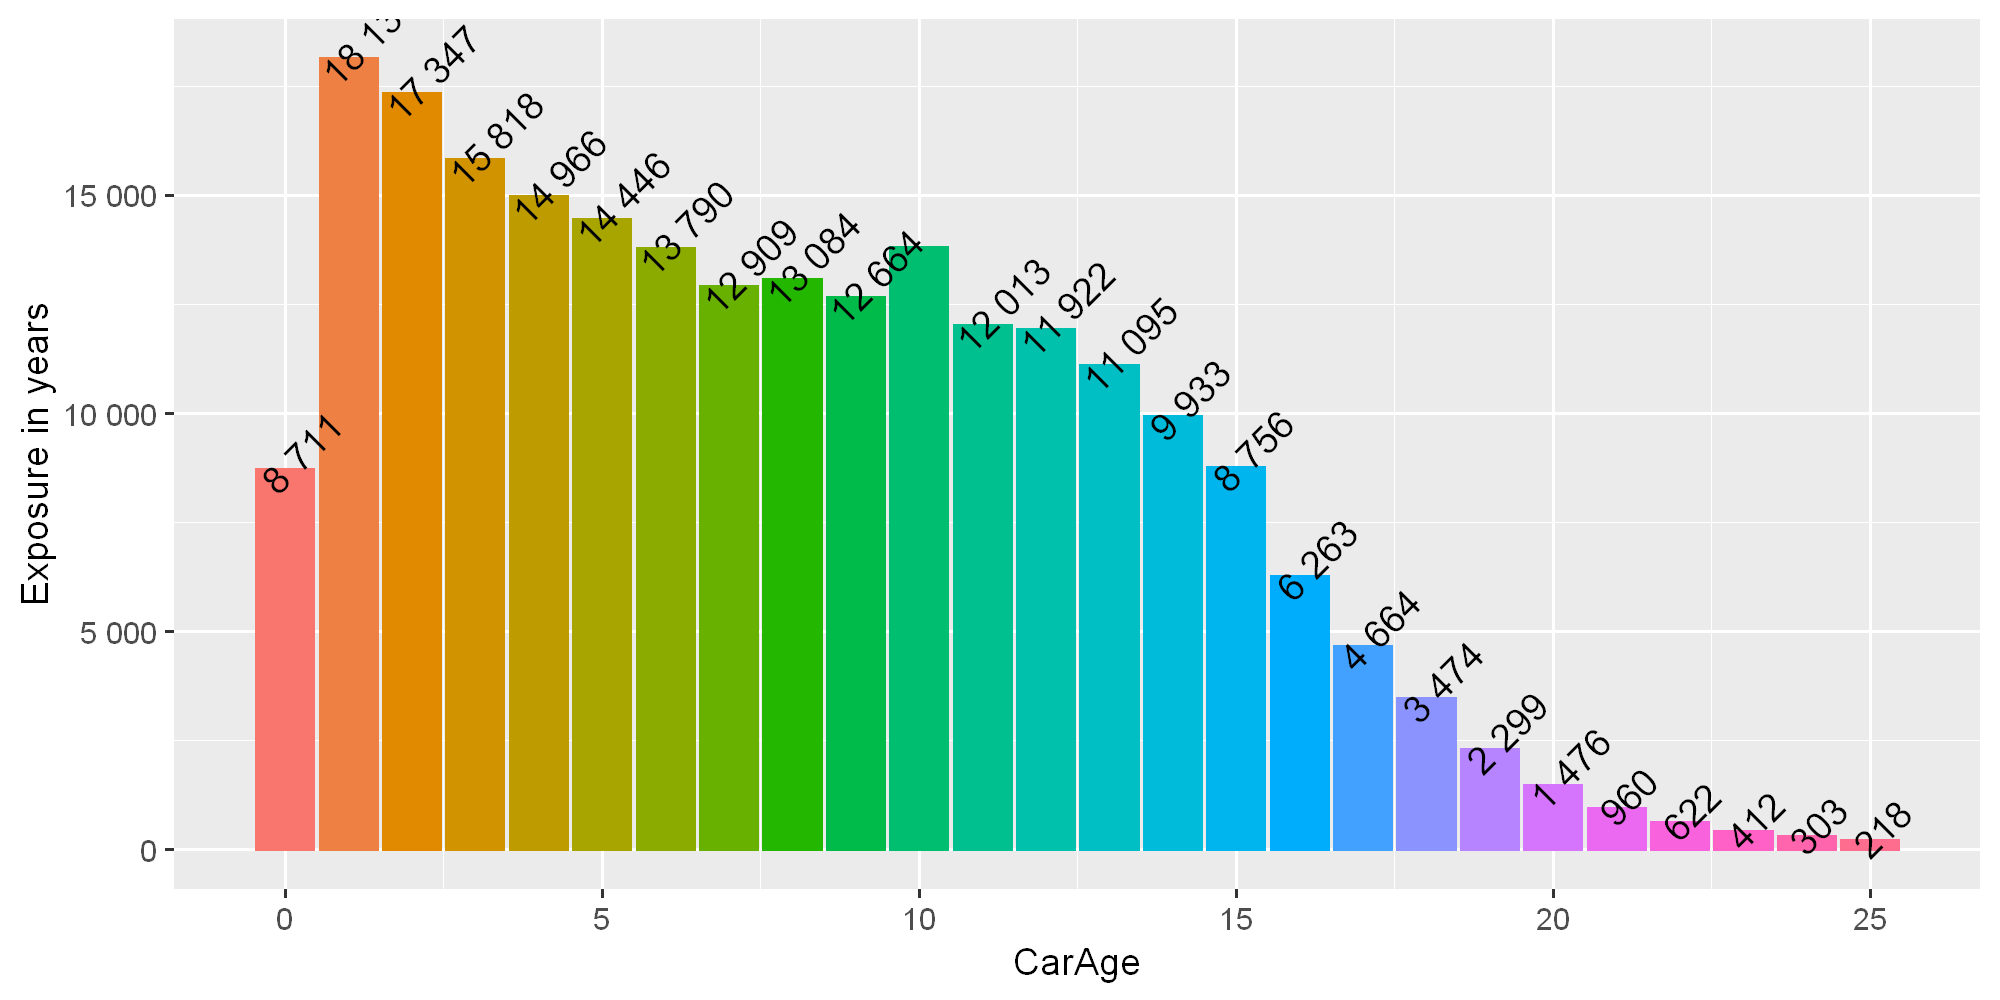

In [124]:
ggplot(CarAge.summary, aes(x=CarAge,
                          y=totalExposure, 
                          fill=factor(CarAge), 
                          color=factor(CarAge), 
                          label=label_number(accuracy=1)(totalExposure))) + 
  geom_bar(stat="identity")+
  geom_text(stat='identity', color="black", hjust=0.25, vjust=0.5,  angle=45, check_overlap=TRUE)+
  scale_x_continuous(breaks = seq(0,100,5))+
  scale_y_continuous(name = "Exposure in years", labels = label_number())+
  theme(legend.position = 'none')

We can see a large difference, specially for new cars, which makes sense ! Indeed, let us look at the Exposure for recent vehicles, using a boxplot for instance.

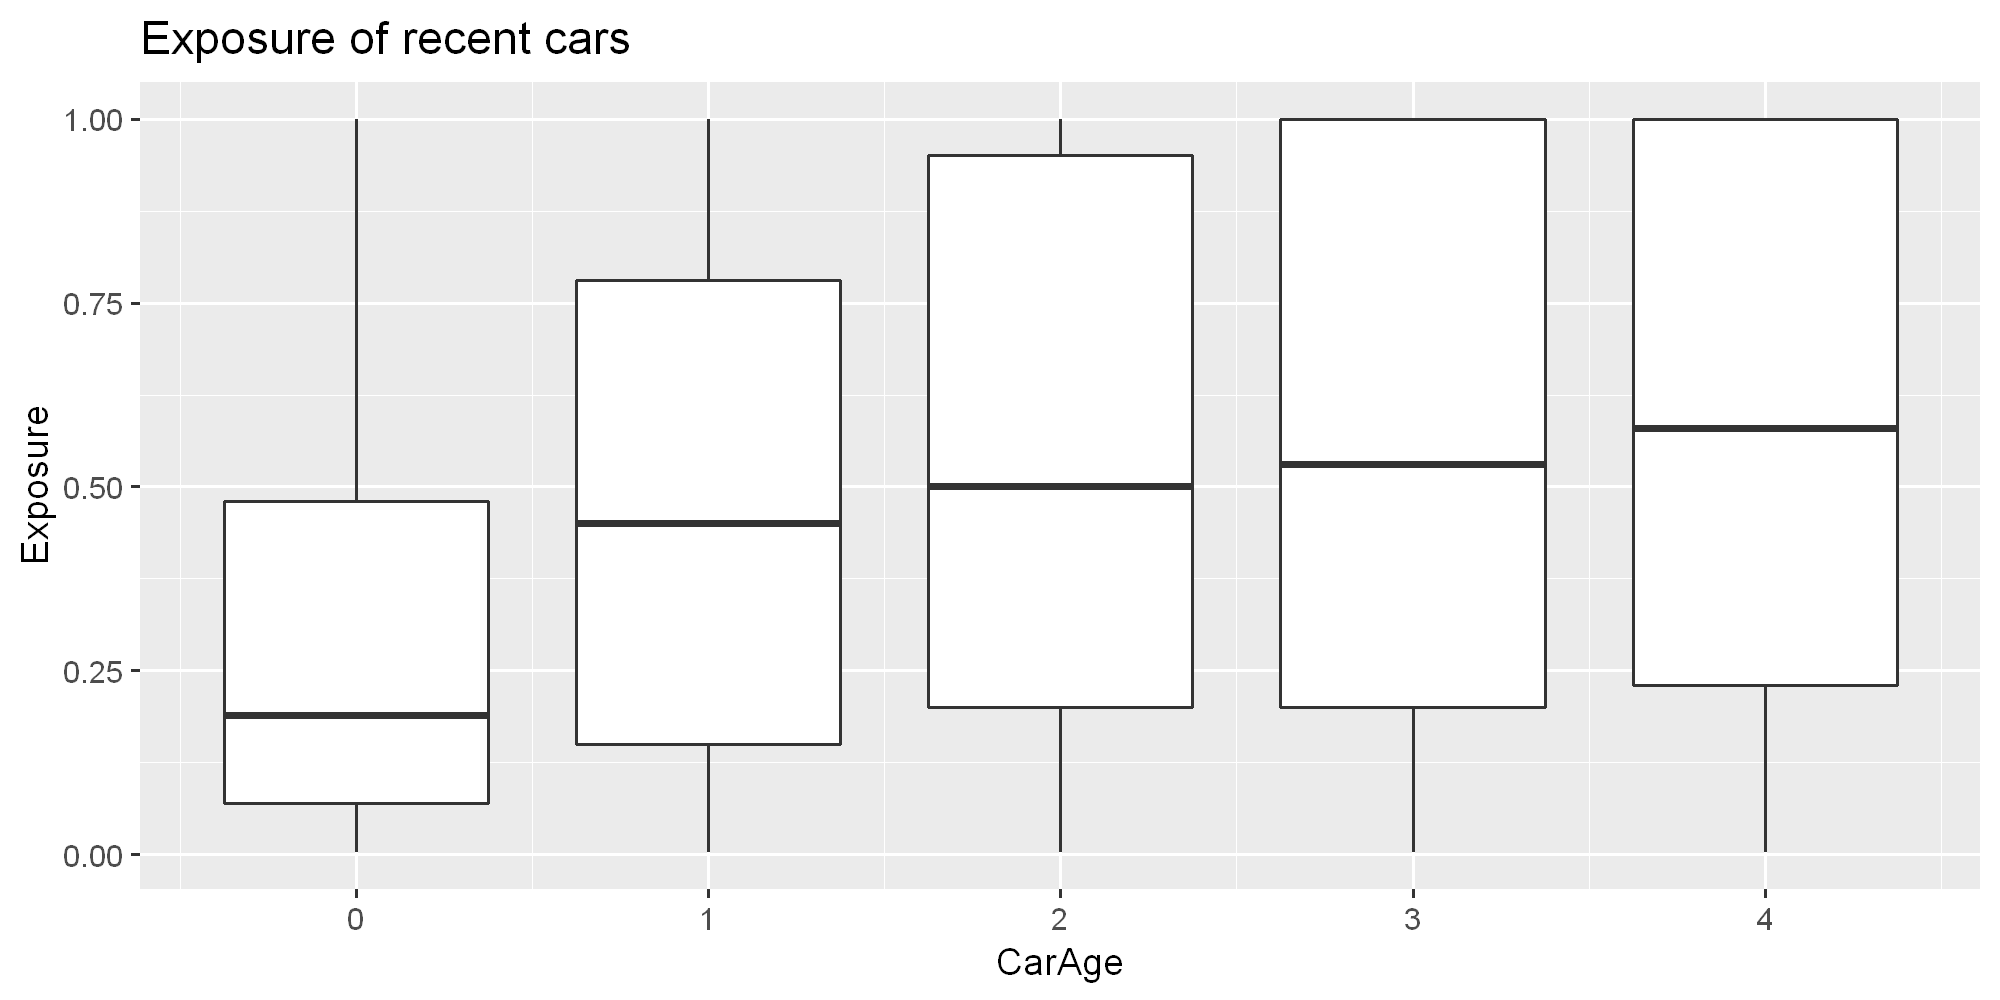

In [125]:
ggplot(dataset%>% filter(CarAge<5), aes(x=CarAge, y=Exposure,  group=CarAge)) + 
  geom_boxplot() +
  ggtitle("Exposure of recent cars")

Let us now also compute the claim frequencies by age of car and plot them.

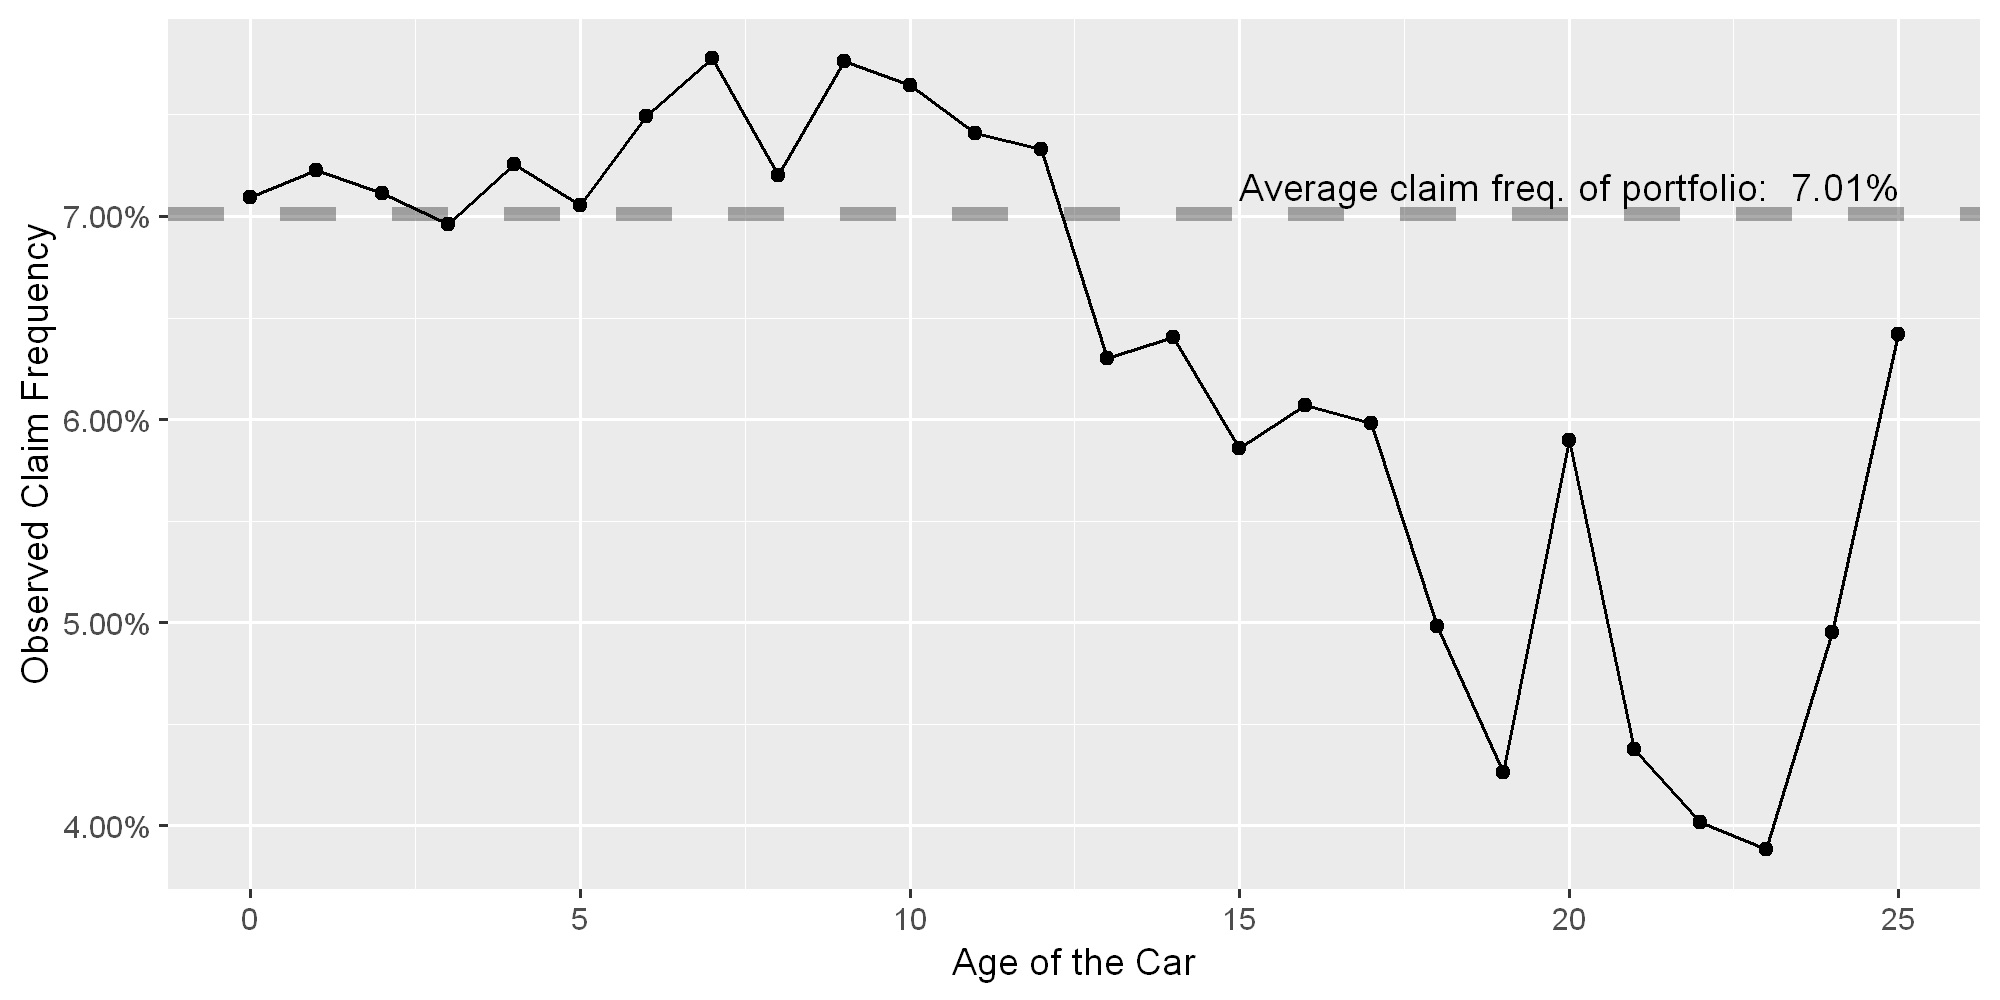

In [126]:
CarAge.summary = dataset %>% group_by(CarAge) %>% summarise(totalExposure = sum(Exposure), 
                                                             Number.Observations = length(Exposure), 
                                                             Number.Claims = sum(ClaimNb), 
                                                             Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))

portfolio.cf = with(dataset, sum(ClaimNb)/ sum(Exposure))

ggplot(CarAge.summary, aes(x=CarAge, 
                          y=Obs.Claim.Freq,
                          label = percent(Obs.Claim.Freq, accuracy = 0.01))) + 
  geom_point() + geom_line()+
  geom_hline(yintercept=portfolio.cf, color="black", size= 2, linetype="dashed", alpha = 0.33) +
    annotate(geom="text", 
           x=20, y=portfolio.cf, 
           vjust=-0.5, 
           label=paste("Average claim freq. of portfolio: ", percent(portfolio.cf, accuracy = 0.01)), 
           color="black")+
  scale_x_continuous(name = "Age of the Car", breaks=seq(0,100,5))+
  scale_y_continuous(name = "Observed Claim Frequency", labels = percent_format(accuracy = 0.01))+
  theme(legend.position = 'none')


### DriverAge
Similarly to the Age of the Car, we can visualize the Age of the Drivers.

In [127]:
DriverAge.summary = dataset %>% group_by(DriverAge) %>% summarise(totalExposure = sum(Exposure), 
                                                                  Number.Observations = length(Exposure), 
                                                                  Number.Claims = sum(ClaimNb), 
                                                                  Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))
head(DriverAge.summary,9)

DriverAge,totalExposure,Number.Observations,Number.Claims,Obs.Claim.Freq
<int>,<dbl>,<int>,<int>,<dbl>
18,148.4220,497,46,0.3099271
19,636.9296,1610,171,0.2684755
20,1020.8744,2529,216,0.2115833
21,1277.9390,3040,207,0.1619796
22,1562.9872,3548,239,0.1529123
23,1830.1058,4156,230,0.1256758
24,2162.8787,4862,230,0.1063398
25,2495.9025,5556,240,0.0961576
26,2937.4324,6468,312,0.1062152


We can show the Exposures by Age of the Driver...

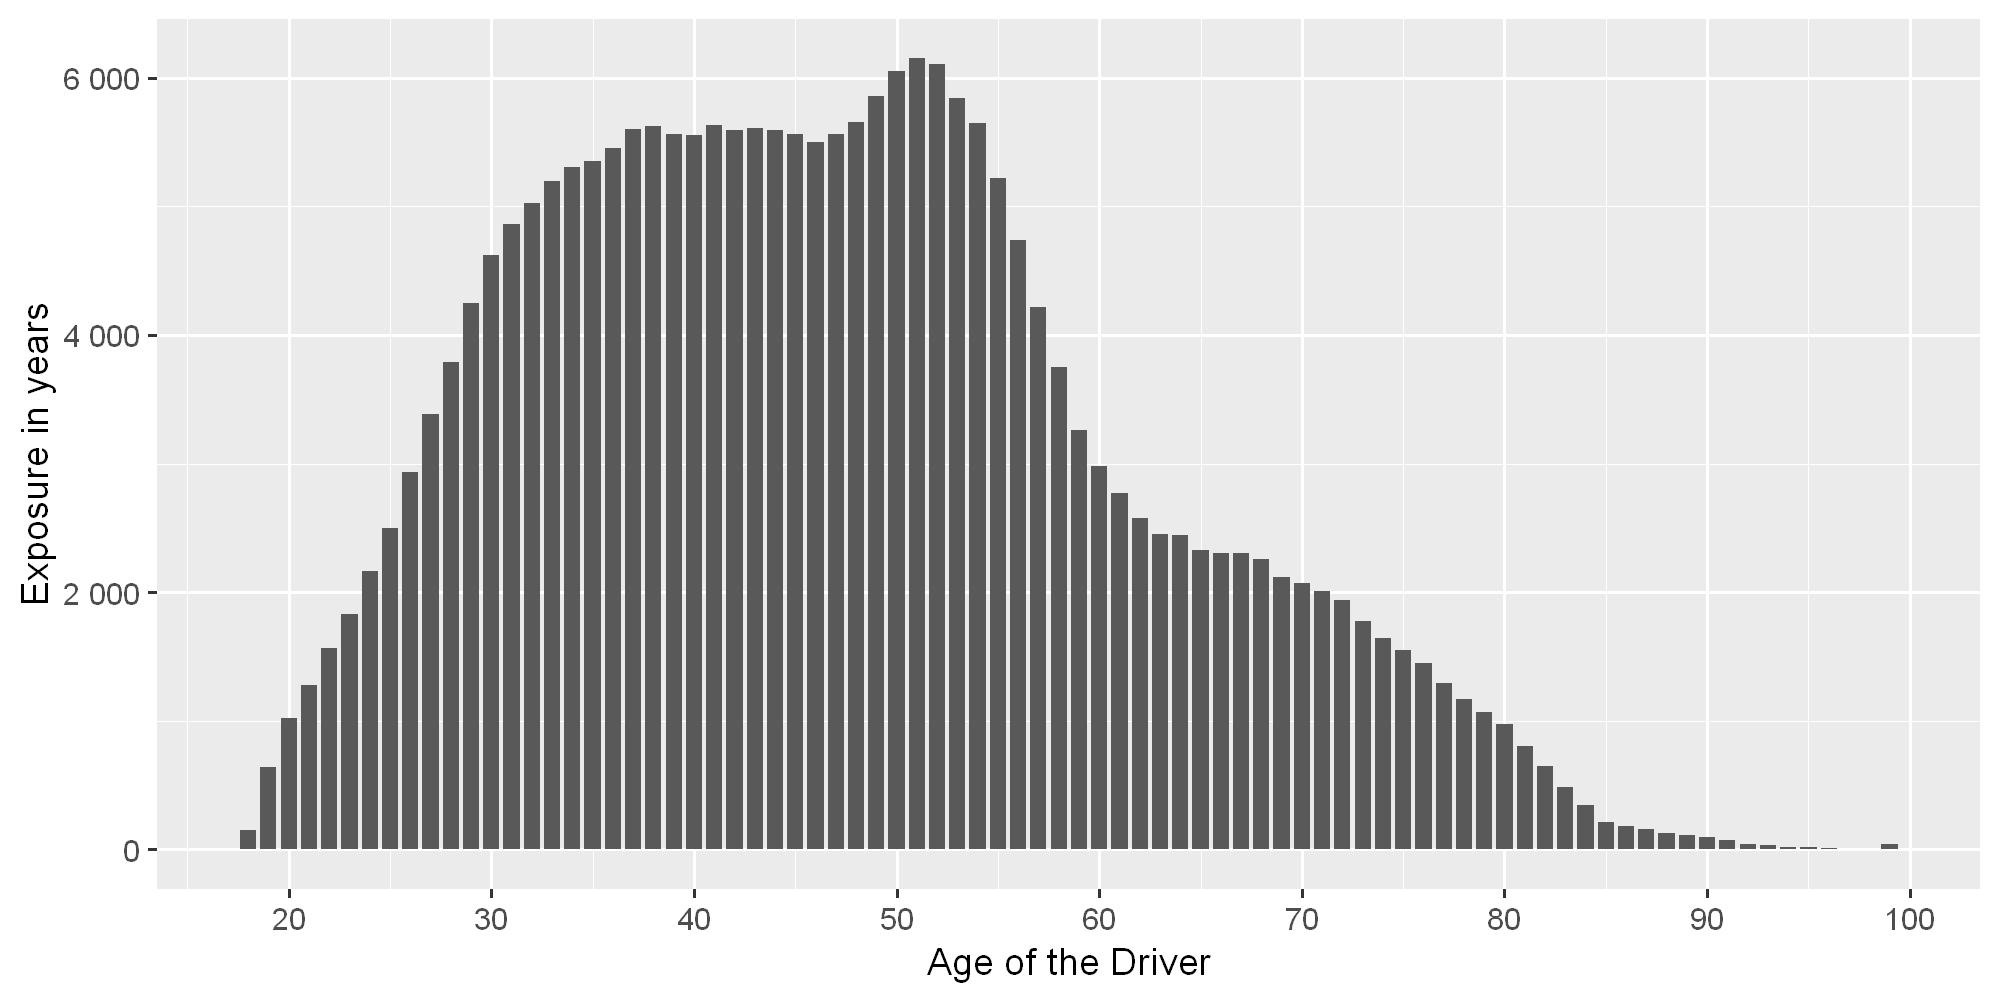

In [128]:
ggplot(DriverAge.summary, aes(x=DriverAge, y=totalExposure)) + 
  geom_bar(stat='identity', width=0.8) + 
  scale_y_continuous(name="Exposure in years", labels = label_number())+
  scale_x_continuous(name="Age of the Driver", breaks = seq(10,150,10))

... and the observed claim frequency by Age.

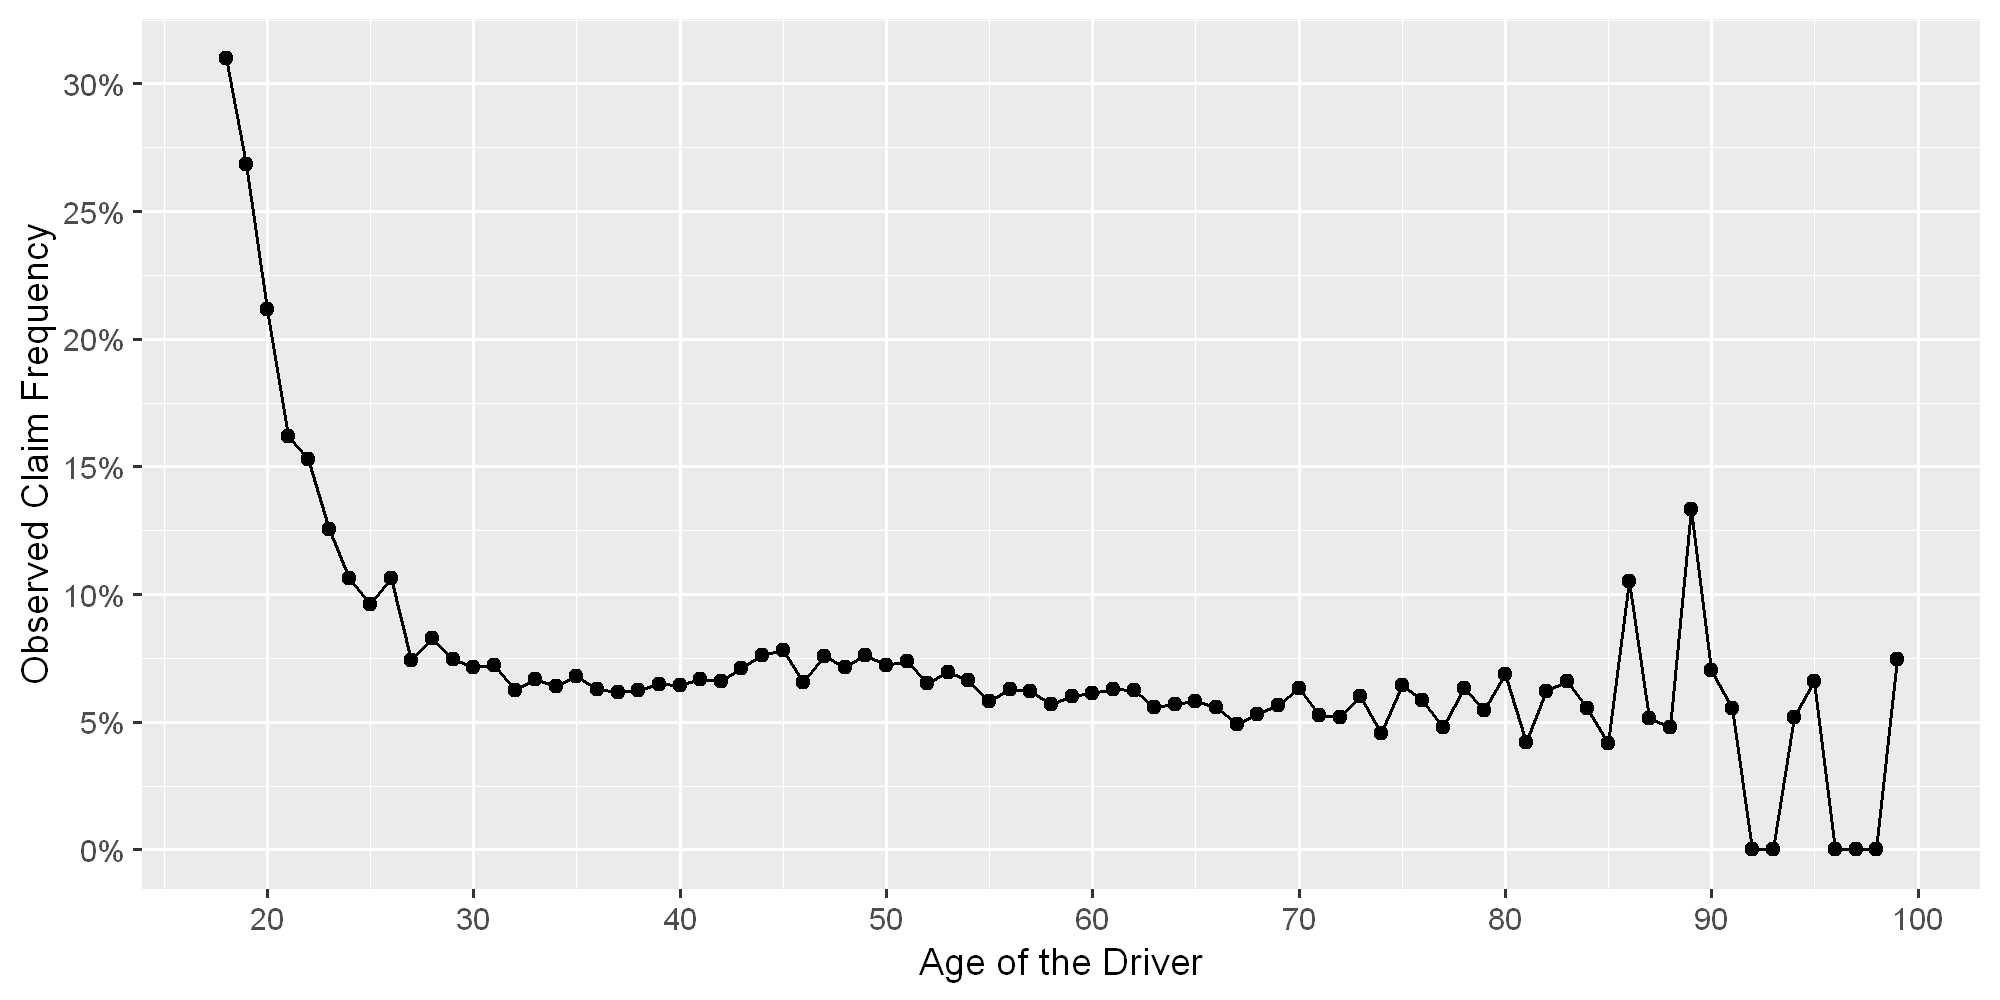

In [129]:
ggplot(DriverAge.summary, aes(x=DriverAge, y=Obs.Claim.Freq)) + 
  geom_line()+geom_point()+
  scale_y_continuous(name="Observed Claim Frequency", labels = percent, breaks = seq(0,0.50,0.05))+
  scale_x_continuous(name="Age of the Driver", breaks = seq(10,150,10))

### Brand
The variable **Brand** is a categorized variable, related to the brand of the car. 
We can see the different *levels* of a *factor* by using the function **level** in R:

In [130]:
levels(dataset$Brand)

[1] "Fiat"                               "Japanese (except Nissan) or Korean"
[3] "Mercedes, Chrysler or BMW"          "Opel, General Motors or Ford"      
[5] "other"                              "Renault, Nissan or Citroen"        
[7] "Volkswagen, Audi, Skoda or Seat"

In [131]:
Brand.summary = dataset %>% group_by(Brand) %>% summarise(totalExposure = sum(Exposure), 
                                                          Number.Observations = length(Exposure), 
                                                          Number.Claims = sum(ClaimNb), 
                                                          Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))
                                          
Brand.summary

Brand,totalExposure,Number.Observations,Number.Claims,Obs.Claim.Freq
<fct>,<dbl>,<int>,<int>,<dbl>
Fiat,9464.320,16653,714,0.07544123
Japanese (except Nissan) or Korean,31228.966,79031,2078,0.06654079
"Mercedes, Chrysler or BMW",10392.166,19087,828,0.07967540
"Opel, General Motors or Ford",21733.558,37287,1731,0.07964642
other,5676.076,9738,412,0.07258535
"Renault, Nissan or Citroen",133460.245,216684,8905,0.06672399
"Volkswagen, Audi, Skoda or Seat",18127.227,32384,1459,0.08048666


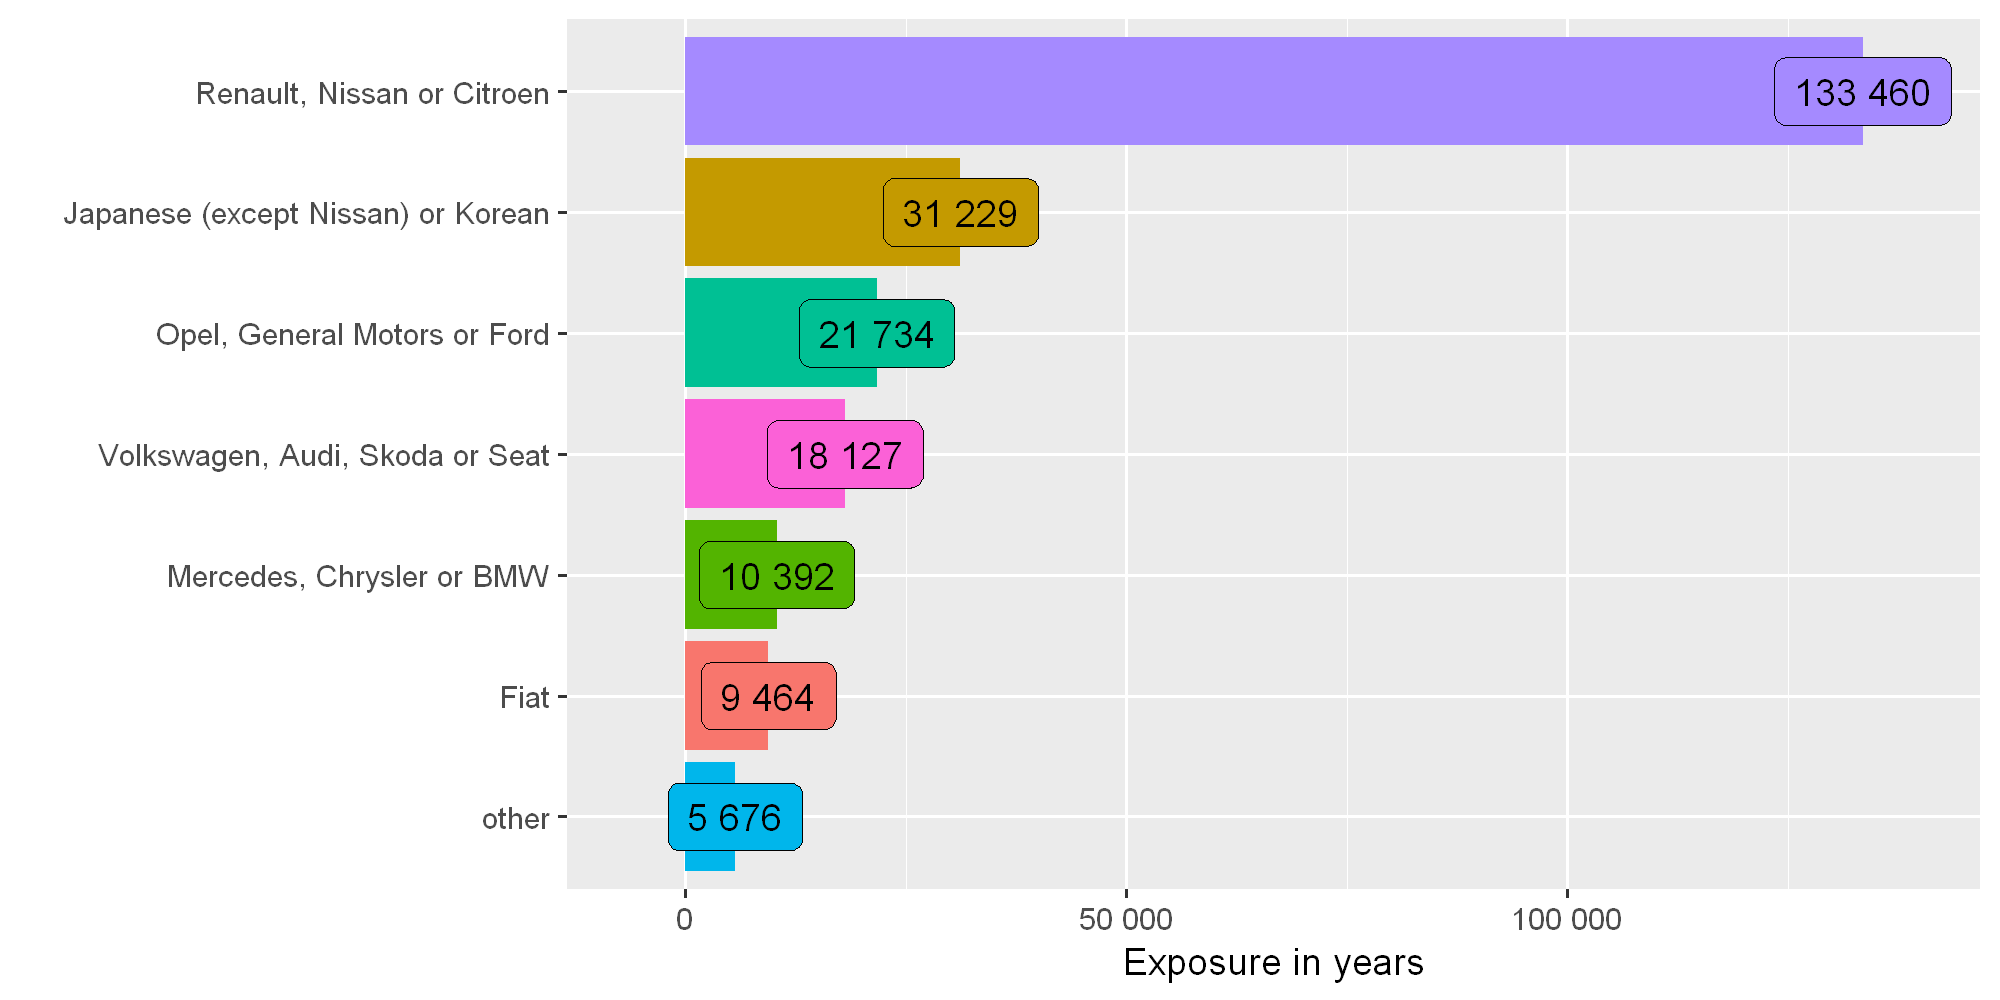

In [132]:
ggplot(Brand.summary, aes(x=reorder(Brand,totalExposure), 
                          y=totalExposure, 
                          fill=Brand,
                          label = label_number()(totalExposure))) +
  geom_bar(stat='identity') +
  coord_flip()+guides(fill='none')+
  scale_x_discrete(name = "") + 
  scale_y_continuous("Exposure in years", labels = label_number(), expand = c(0.10, 0))+
  geom_label()

Let us now look at the claim frequency by Brand of the car.

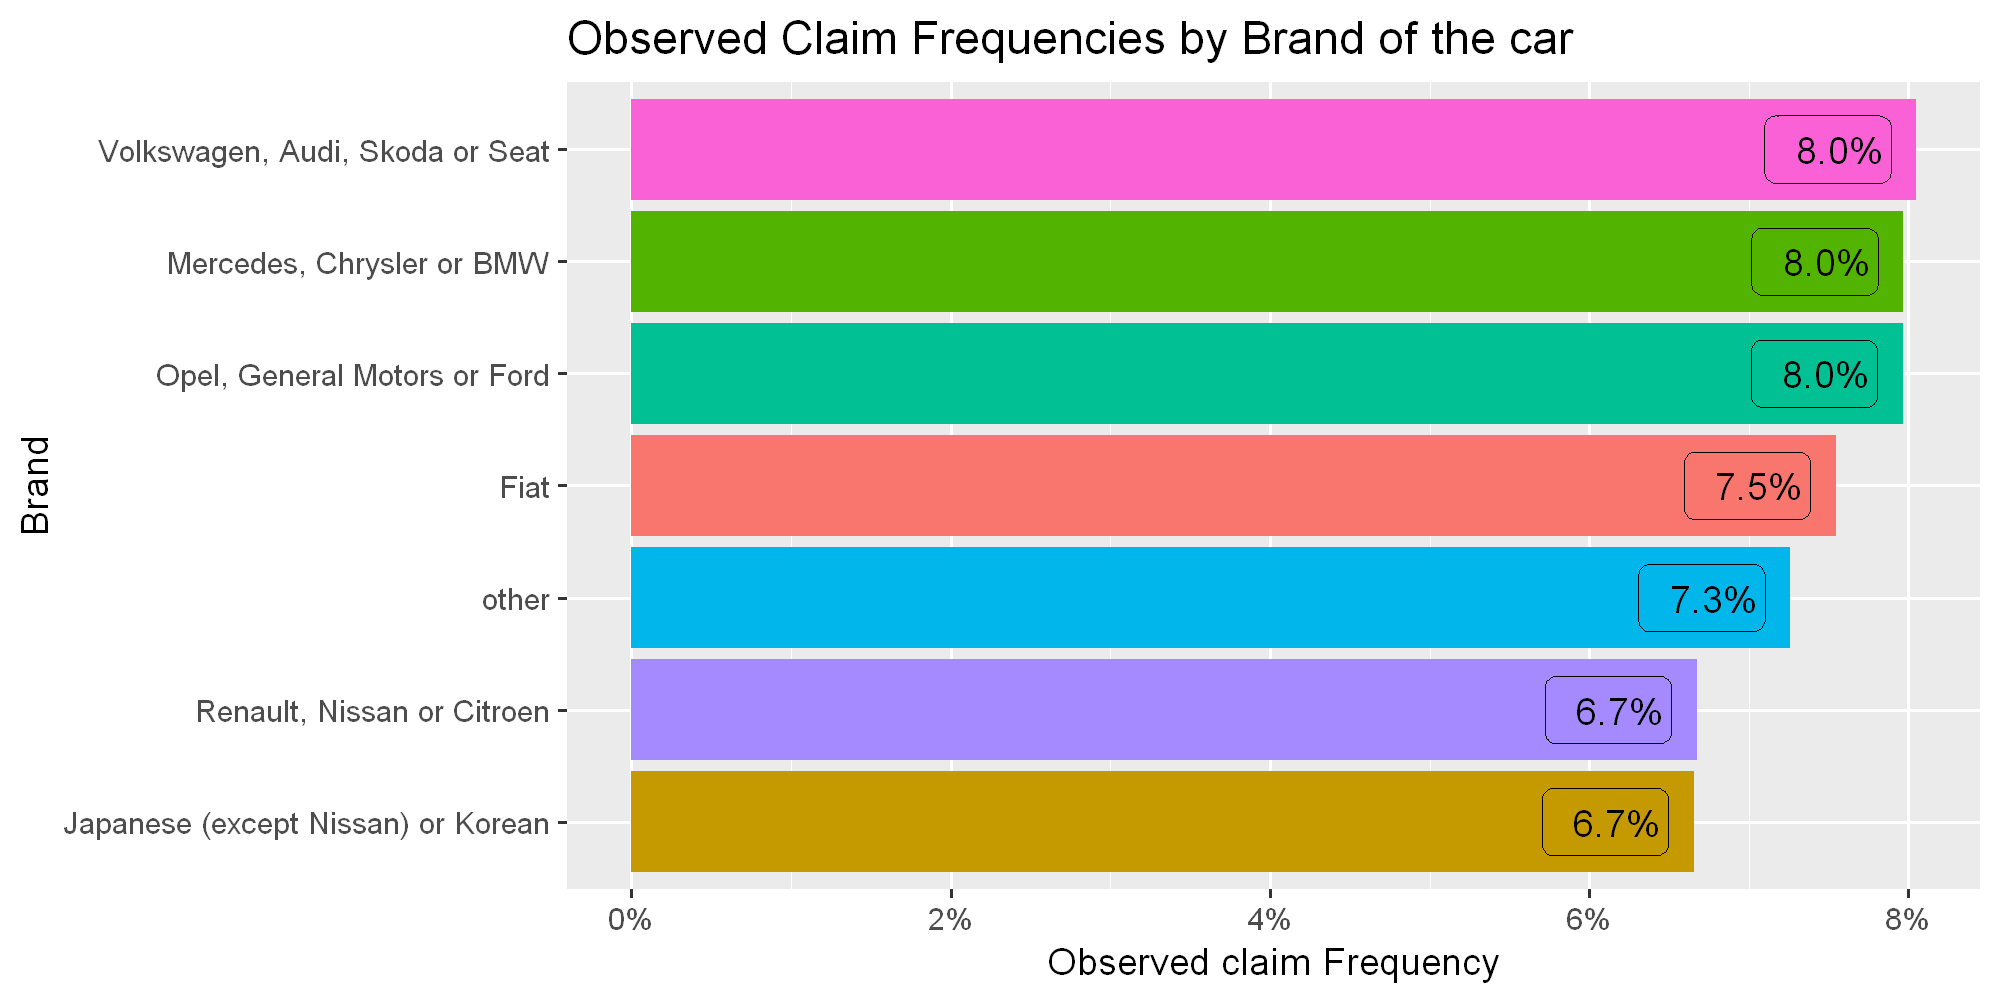

In [133]:
ggplot(Brand.summary, aes(x=reorder(Brand,Obs.Claim.Freq), 
                          y=Obs.Claim.Freq, 
                          fill=Brand,
                          label = percent(Obs.Claim.Freq, accuracy=0.1))) +
  geom_bar(stat='identity') +
  geom_label(hjust=+1.2)+
  coord_flip()+guides(fill='none')+ ggtitle("Observed Claim Frequencies by Brand of the car")+
  scale_x_discrete(name = "Brand") + 
  scale_y_continuous("Observed claim Frequency", labels = percent)

### Gas
The variable *Gas* is a categorized variable, related to the fuel of the car. 
We can see the different *levels* of a *factor* by using the function **level** in R:

In [134]:
levels(dataset$Gas)

[1] "Diesel"  "Regular"

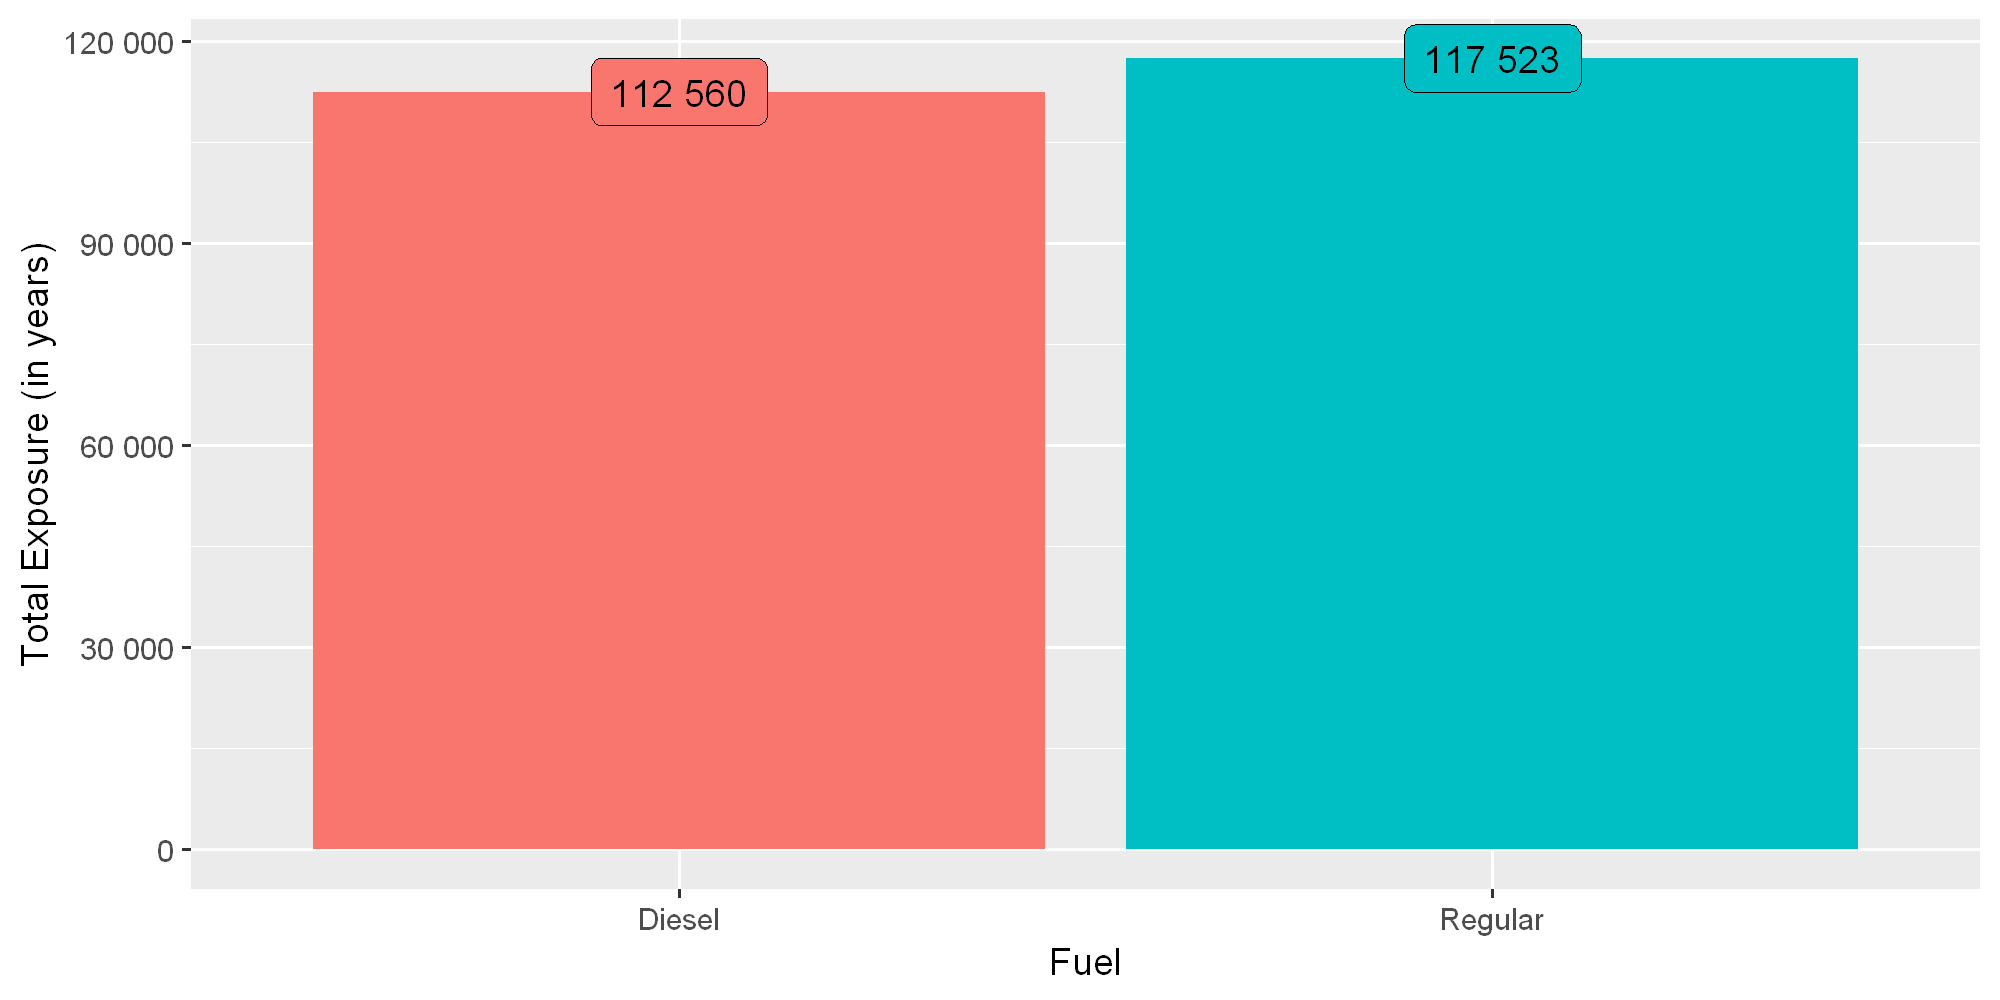

In [135]:
Gas.summary = dataset %>% group_by(Gas) %>% summarise(totalExposure = sum(Exposure), 
                                                      Number.Observations = length(Exposure), 
                                                      Number.Claims = sum(ClaimNb), 
                                                      Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))
ggplot(Gas.summary, aes(x=Gas, y=totalExposure, fill=Gas, label = number(totalExposure))) + 
  geom_bar(stat="identity") + 
  geom_label()+
  guides(fill='none')+
  scale_x_discrete(name = "Fuel")+
  scale_y_continuous(name='Total Exposure (in years)', labels = number)

There seems to be a similar amount of Diesel and Regular gas vehicles in the portfolio.
It is generally expected that Diesel have a higher claim frequency. Does this also hold on our dataset ?

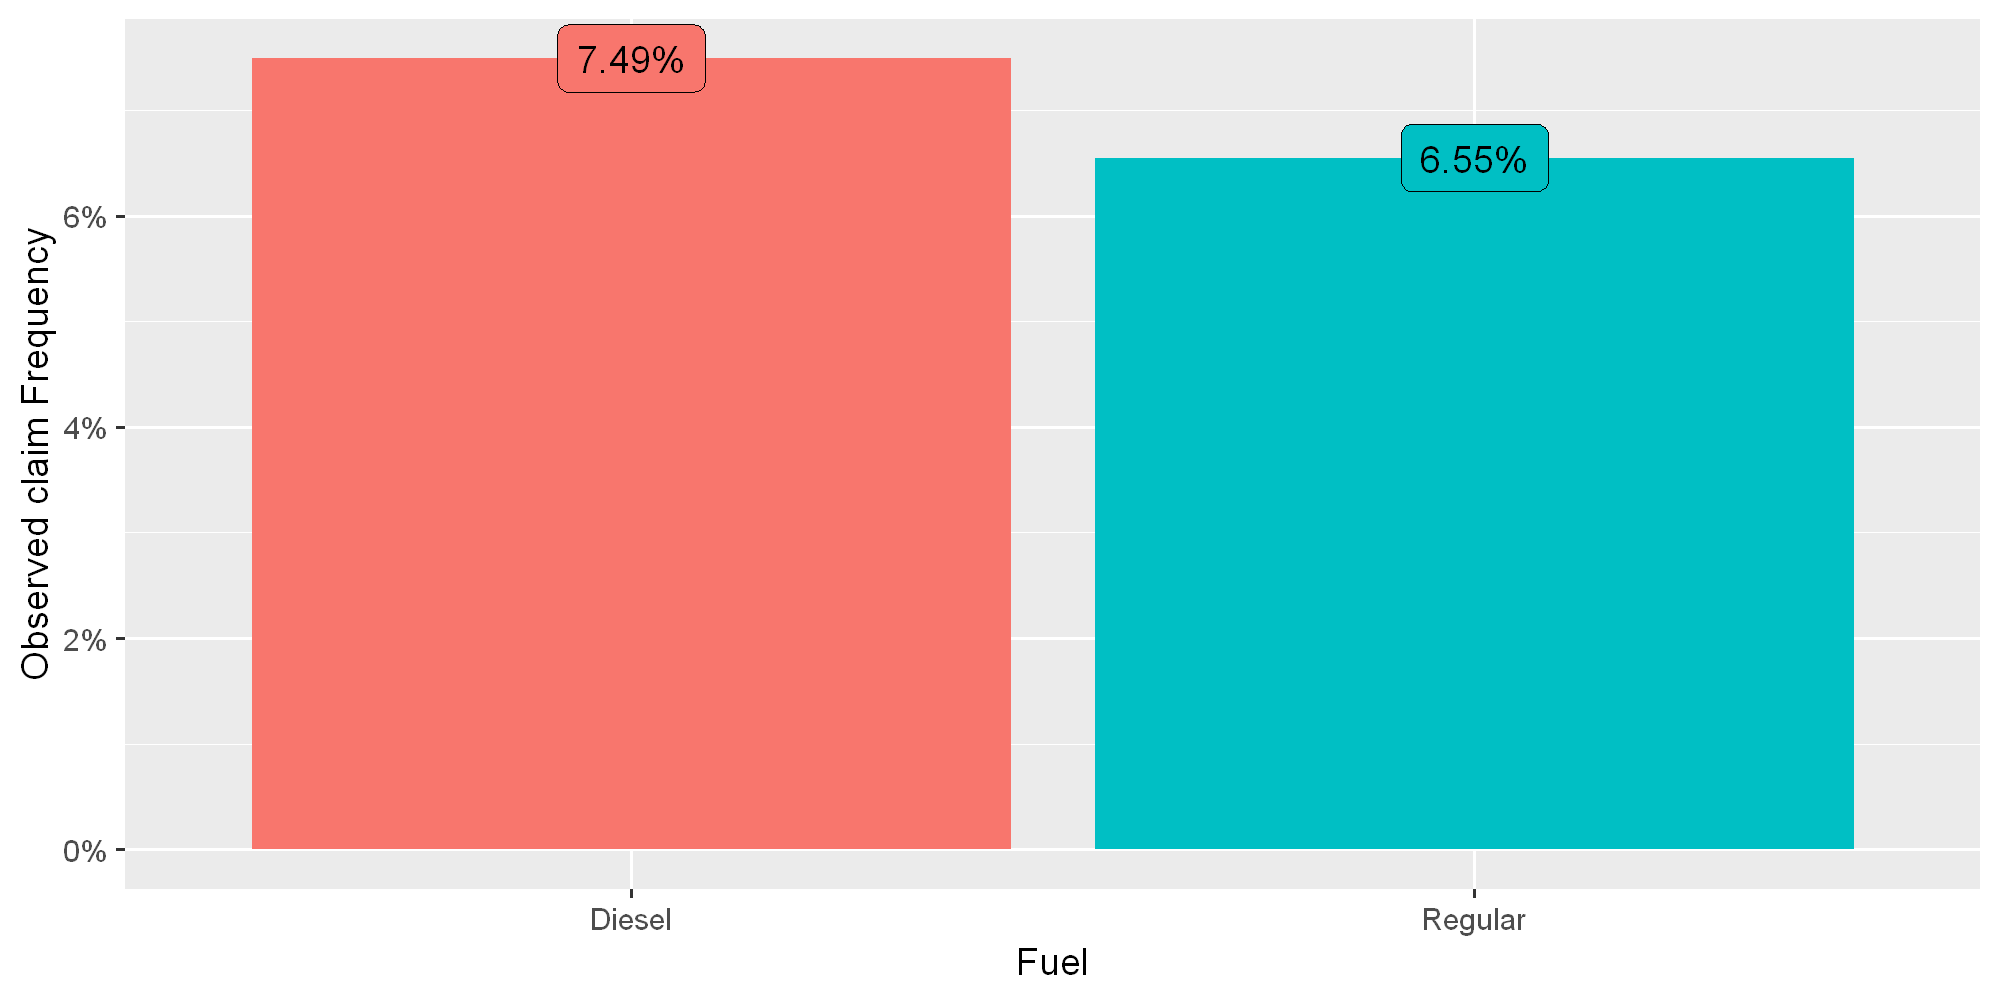

In [136]:
ggplot(Gas.summary, 
       aes(x=Gas, y=Obs.Claim.Freq, 
           fill=Gas, 
           label = percent(Obs.Claim.Freq))) + 
  geom_bar(stat="identity") + 
  geom_label()+  guides(fill='none')+
  scale_x_discrete(name = "Fuel") + 
  scale_y_continuous("Observed claim Frequency", labels = percent)

### Region
The variable *Region* is a categorized variable, related to the region of the place of residence. 
We can see the different *levels* of a *factor* by using the function **level** in R:

In [137]:
levels(dataset$Region)

[1] "Aquitaine"          "Basse-Normandie"    "Bretagne"          
 [4] "Centre"             "Haute-Normandie"    "Ile-de-France"     
 [7] "Limousin"           "Nord-Pas-de-Calais" "Pays-de-la-Loire"  
[10] "Poitou-Charentes"

What are the Exposures in each region ? What are the observed claim frequencies ?

In [138]:
Region.summary = dataset %>% group_by(Region) %>% summarize(totalExposure = sum(Exposure), 
                                                           Number.Observations = length(Exposure), 
                                                           Number.Claims = sum(ClaimNb), 
                                                           Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))
Region.summary

Region,totalExposure,Number.Observations,Number.Claims,Obs.Claim.Freq
<fct>,<dbl>,<int>,<int>,<dbl>
Aquitaine,14222.661,31211,1052,0.07396647
Basse-Normandie,6621.738,10848,451,0.06810900
Bretagne,27656.640,41986,1867,0.06750639
Centre,101843.464,159426,6460,0.06343068
Haute-Normandie,3147.222,8726,219,0.06958517
Ile-de-France,30016.992,69576,2575,0.08578474
Limousin,2376.002,4539,196,0.08249152
Nord-Pas-de-Calais,11346.794,27111,939,0.08275465
Pays-de-la-Loire,21791.752,38541,1569,0.07199972


#### Creating Maps

We can plot a map with the observed claim frequencies and the total Exposure.
We first need to obtain the shape files (which contain the borders of each administrative area.)

1. Download shapefile from  http://www.diva-gis.org/gData
2. Extract all the files from the zip files, in a directory called shapefiles in your working directory

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Florian\Documents\UCLouvain\Assurance Dommage\2023\UCLouvain-LACTU2110\1. Introduction\shapefiles\FRA_adm1.shp", layer: "FRA_adm1"
with 22 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 


Regions defined for each Polygons



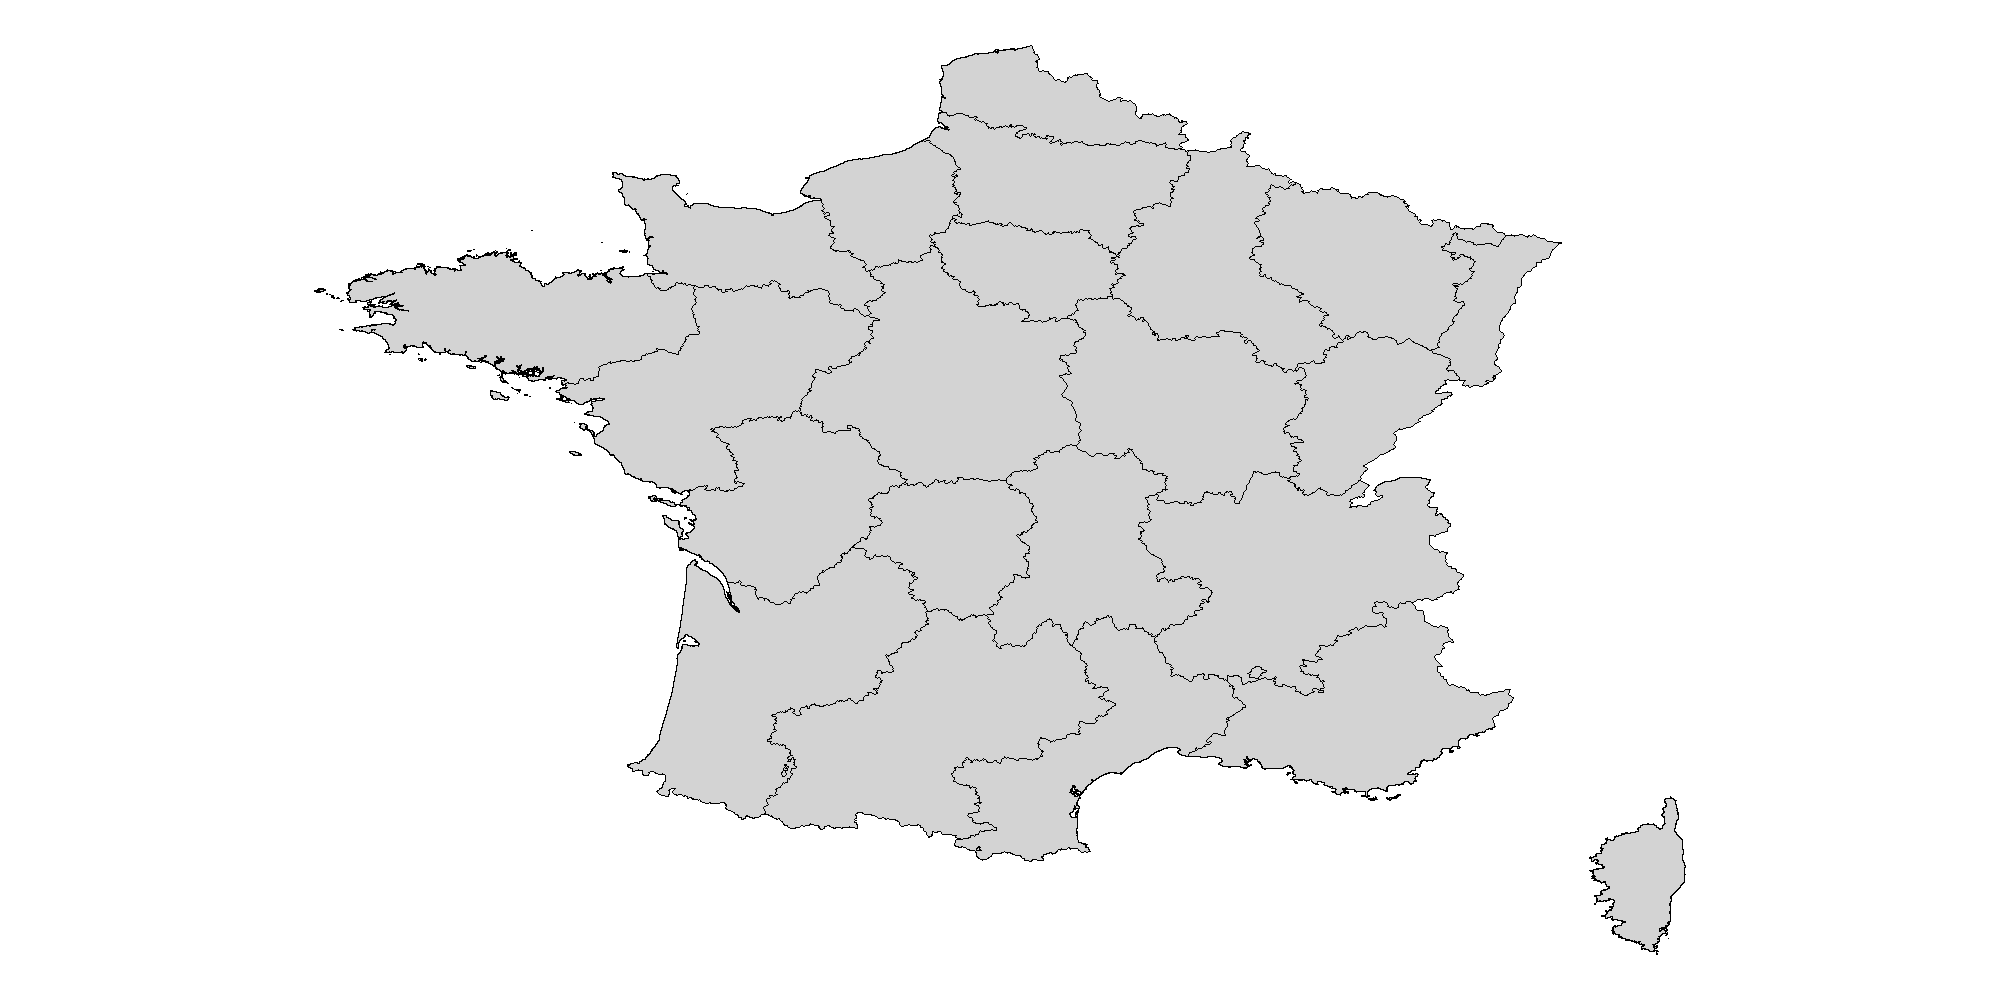

In [148]:
area <- rgdal::readOGR("shapefiles/FRA_adm1.shp", use_iconv = TRUE, encoding = "UTF-8") # From http://www.diva-gis.org/gData

# Note that the tidy function will remove the data.
area_tidy = tidy(area) # package broom

#Plot an "empty" map
ggplot(area_tidy, aes(x = long, y = lat, group = group)) +
  geom_polygon(color = "black", size = 0.1, fill = "lightgrey") +
  coord_equal() + theme_void()

We are now going to include our data into the map

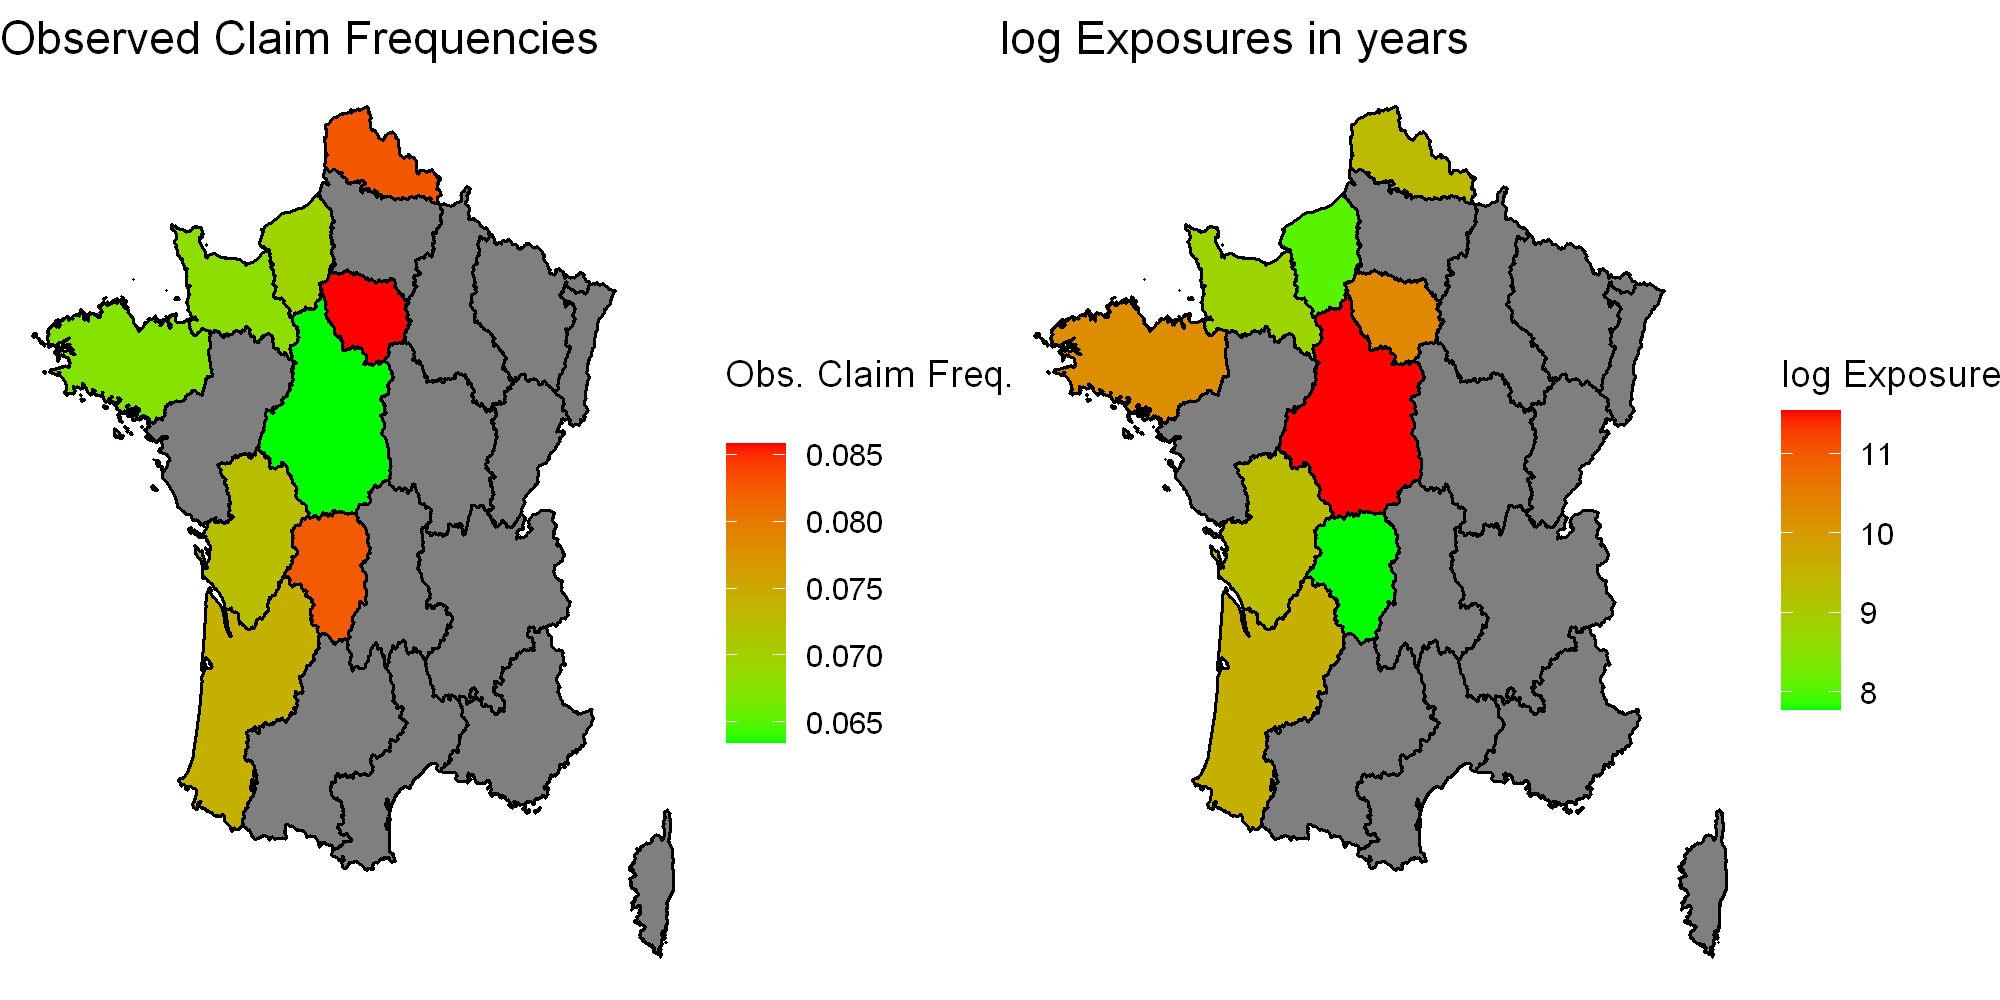

In [140]:
#First we re-include the data (that disappeared with the tidy function)
area$id <- row.names(area)
area_tidy2 <- area_tidy %>% full_join(area@data, by="id")

# Because of accents ...
area_tidy2$NAME_1 = stri_trans_general(str = area_tidy2$NAME_1, 
                   id = "Latin-ASCII")

# Which computed data do we want ?
data_to_add = Region.summary[,c("Region", "totalExposure", "Obs.Claim.Freq")]
# Merge it 
area_tidy2 <- area_tidy2 %>% full_join(data_to_add, by = c("NAME_1" = "Region"))

# Very important: Do not forget to sort by "order" variable.
# area_tidy2 = area_tidy2[order(area_tidy2$order),]
# Easier with dplyr:
area_tidy2 = area_tidy2 %>% arrange(order)

# Finally, plot the data: the claim frequencies
p1 = ggplot(area_tidy2, aes(long, lat, group=group, fill = Obs.Claim.Freq)) + ggtitle("Observed Claim Frequencies")+
  geom_polygon(color="black")+
  scale_fill_gradient(low = "green", high = "red", name="Obs. Claim Freq.")+
xlab("Longitude") + ylab("Latitude") + theme_void()

# and the exposures (on a log-scale)...
p2 = ggplot(area_tidy2, aes(long, lat, group=group, fill = log(totalExposure))) + ggtitle("log Exposures in years")+
  geom_polygon(color="black")+
  scale_fill_gradient(low = "green", high = "red", name="log Exposure")+
xlab("Longitude") + ylab("Latitude") + theme_void()


# Show them next to each other
gridExtra::grid.arrange(p1, p2, ncol=2)

### Density
The Density represents here the density of the population at the place of residence.
Let us take a look at the densities in the dataset.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      67     288    1987    1414   27000 

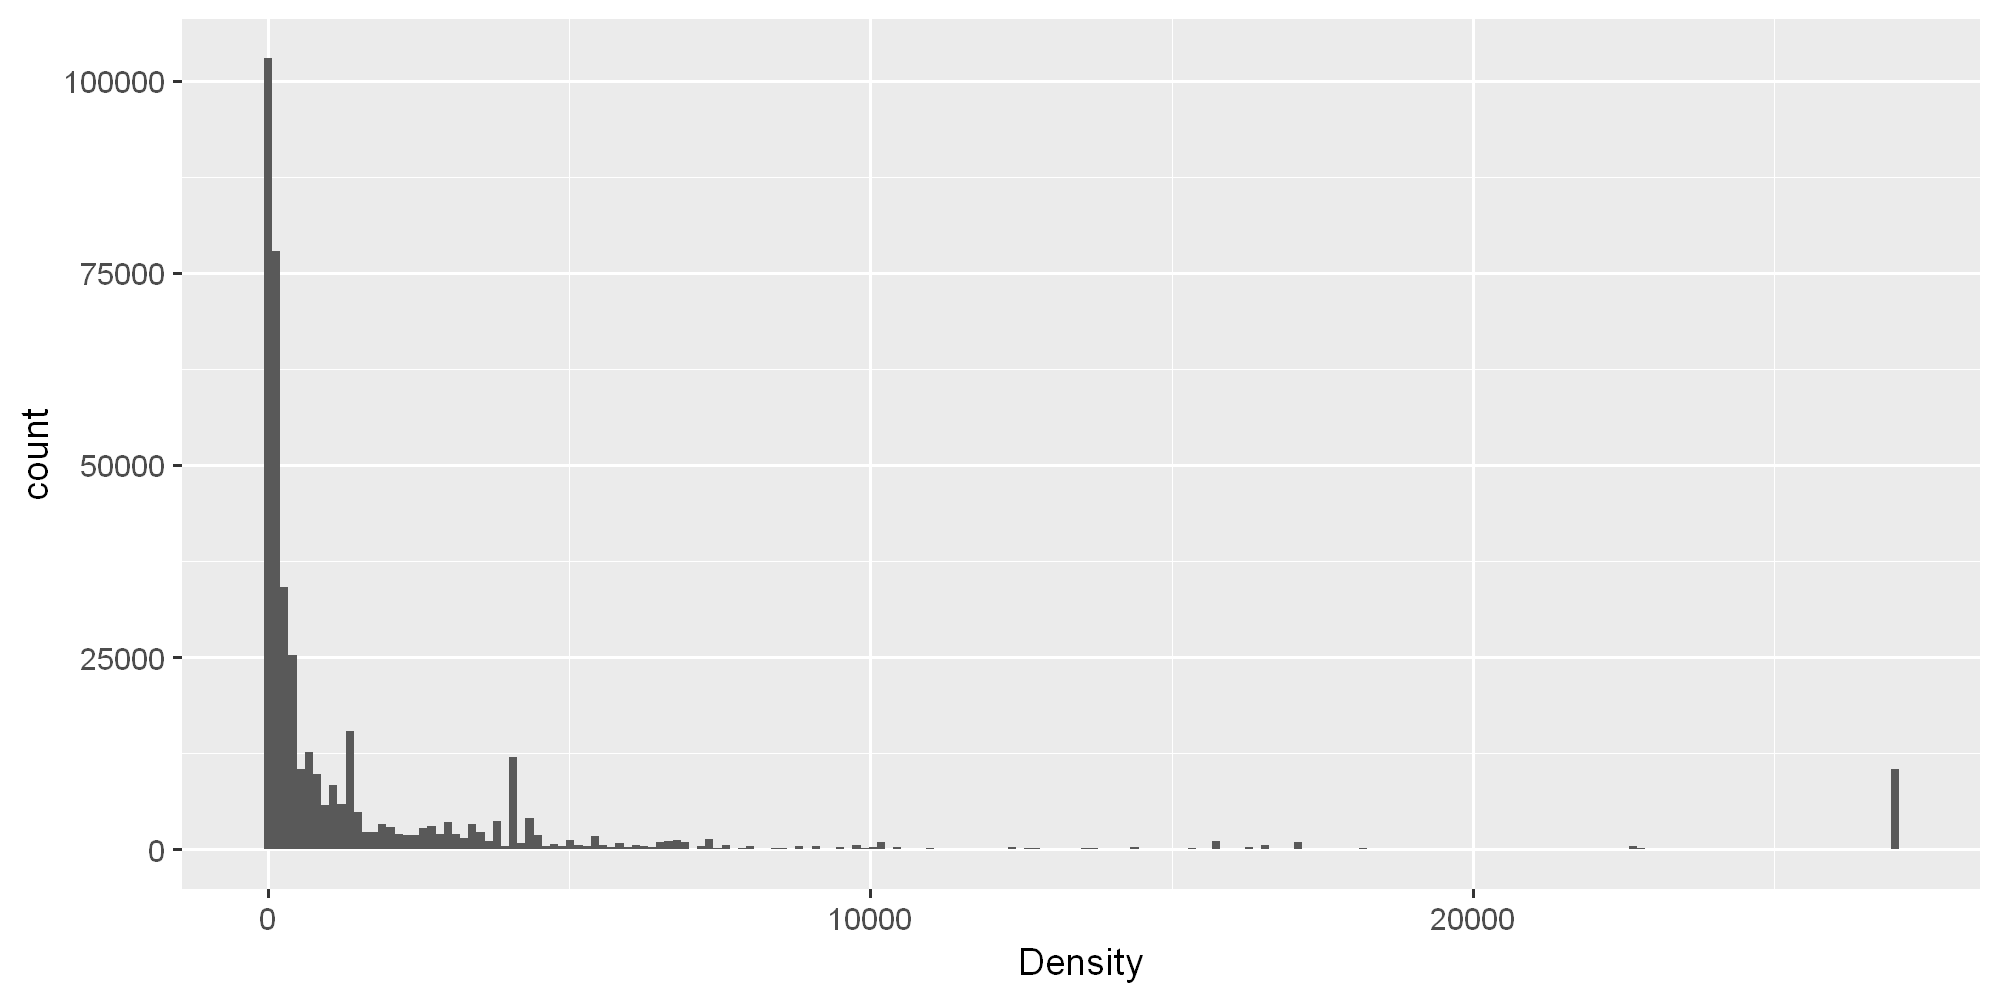

In [141]:
summary(dataset$Density)
ggplot(dataset, aes(Density)) + geom_histogram(bins=200)

Here, contrary to the age of the driver, or the age of the car, the density has lots of different values, as we can see below.

In [142]:
length(unique(dataset$Density))

[1] 1270

Let us still compute as before the summary statistics and plot them ...

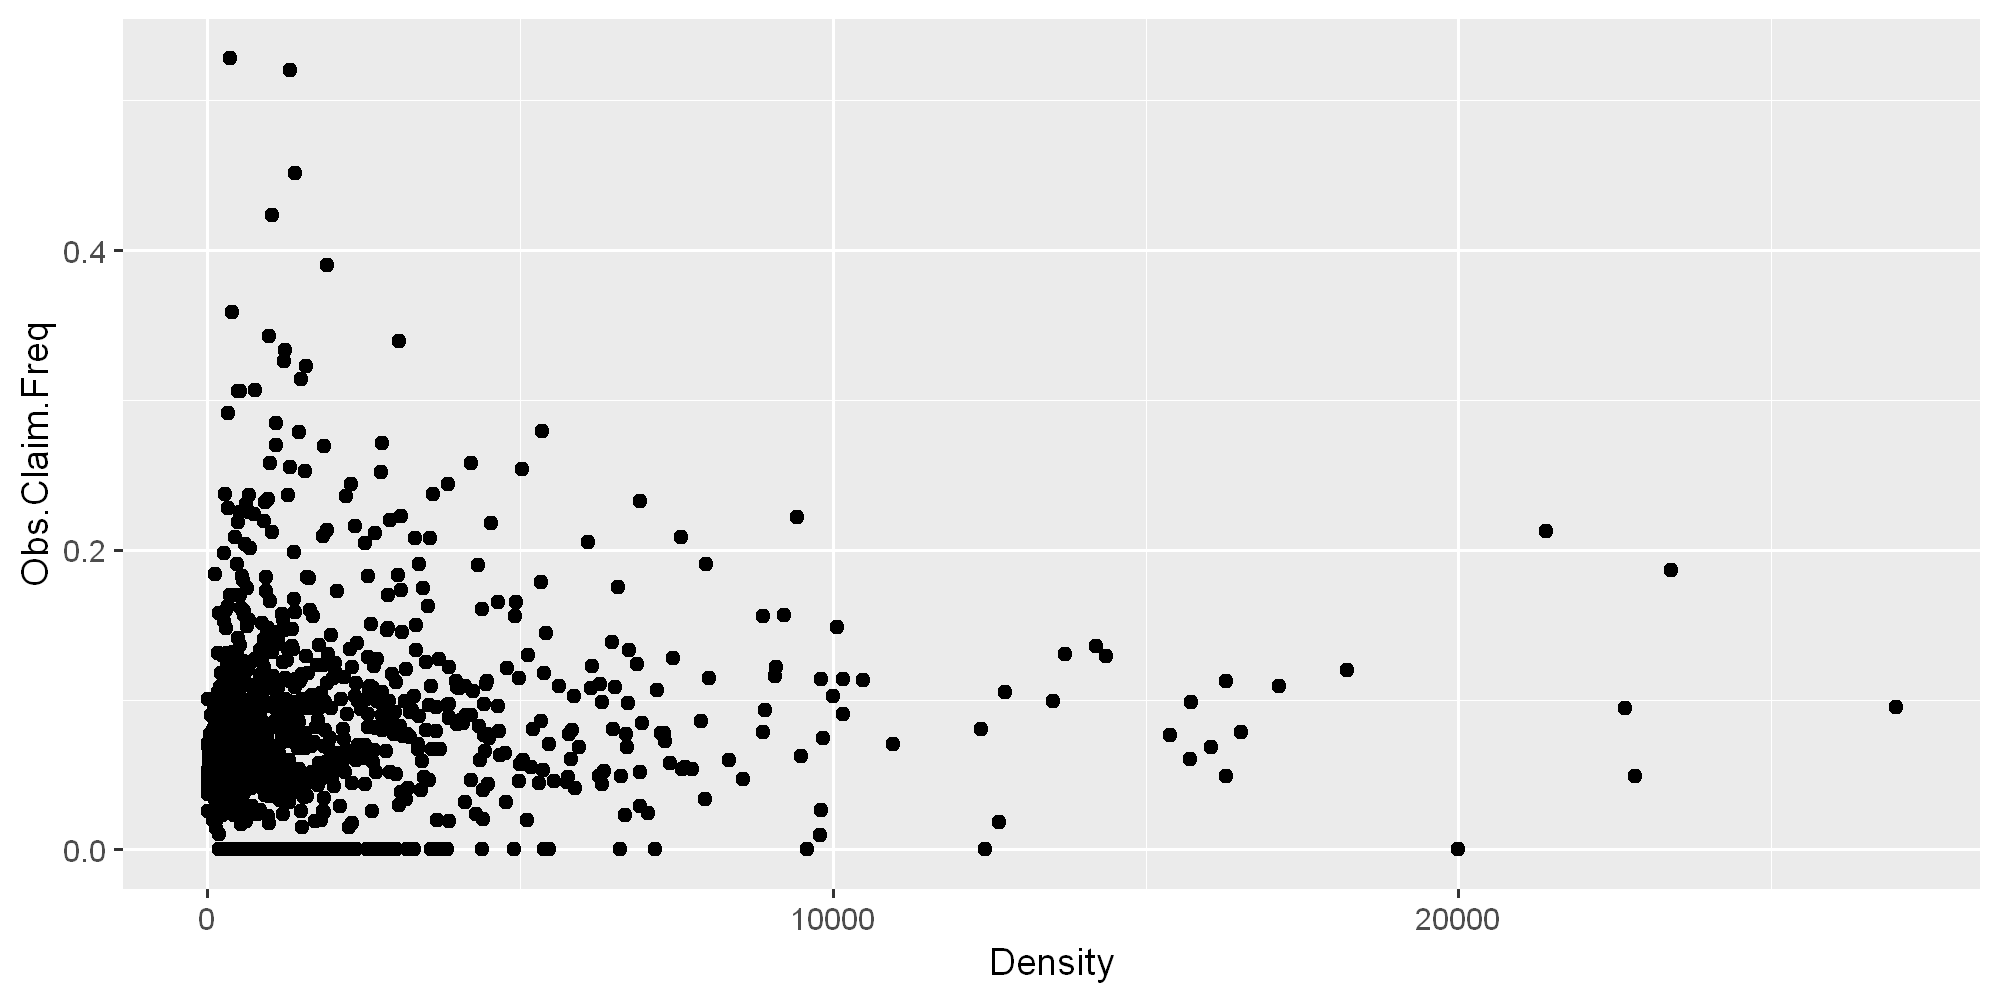

In [143]:
Density.summary = dataset %>% group_by(Density) %>%
                   summarise(totalExposure = sum(Exposure), 
                                Number.Observations = length(Exposure), 
                                Number.Claims = sum(ClaimNb), 
                                Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))
ggplot(Density.summary, aes(x=Density, y=Obs.Claim.Freq)) + geom_point()

... but realize it is impossible to see a trend. One way out is to categorize the variable. We will see later (GAM) that it is possible to estimate a smooth function, which avoid the arbitrary categorization.

We can categorize the variable using the function *cut*.

In [144]:
dataset$DensityCAT = cut(dataset$Density, breaks = quantile(dataset$Density, probs = seq(from = 0, to = 1, by=0.1)),
                         include.lowest = TRUE)
table(dataset$DensityCAT)
levels(dataset$DensityCAT) <- LETTERS[1:10]


             [2,28]             (28,51]             (51,91]            (91,159] 
              41494               41173               41330               40432 
          (159,288]           (288,562]      (562,1.16e+03] (1.16e+03,2.41e+03] 
              41028               41408               40889               41171 
(2.41e+03,4.35e+03]  (4.35e+03,2.7e+04] 
              42408               39531 

Then, we can apply the same strategy as above.

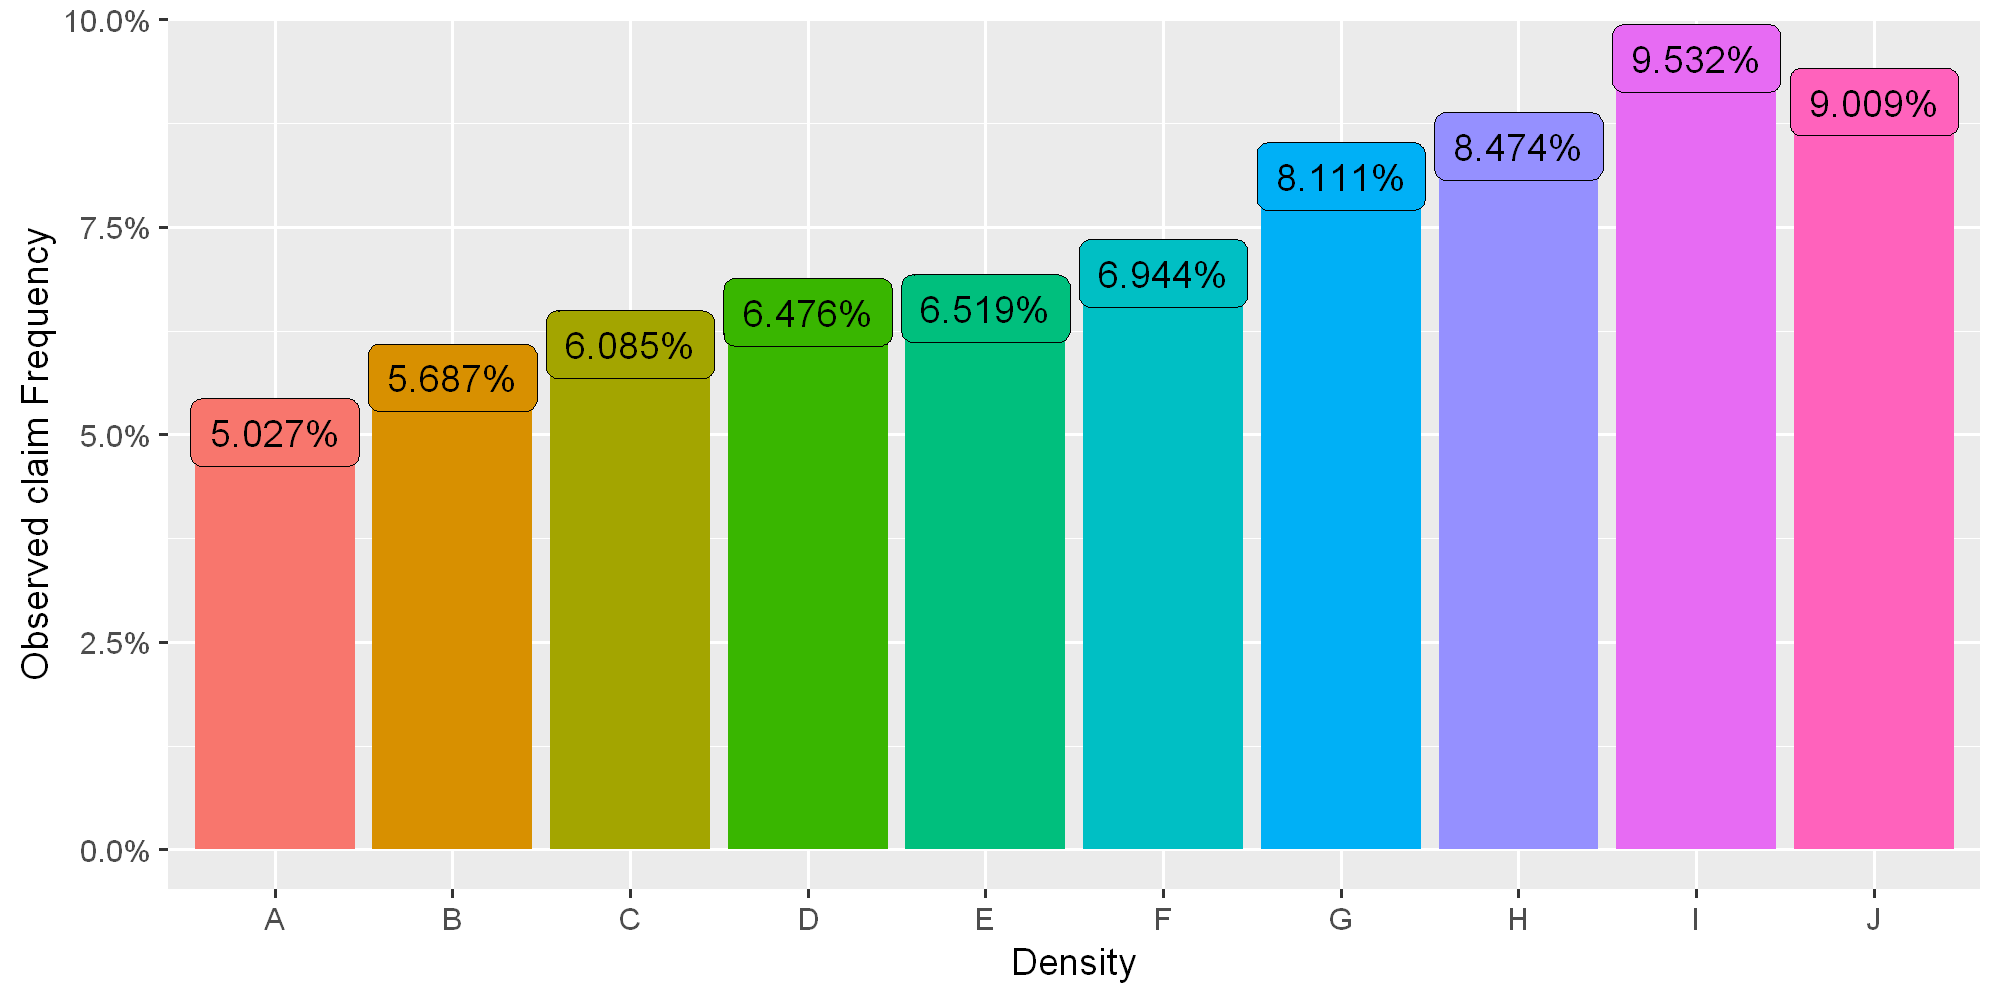

In [145]:
Density.summary = dataset %>% group_by(DensityCAT) %>%
                  summarise(totalExposure = sum(Exposure), 
                            Number.Observations = length(Exposure), 
                            Number.Claims = sum(ClaimNb), 
                            Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))

ggplot(Density.summary, 
       aes(x=DensityCAT, 
           y=Obs.Claim.Freq, 
           fill=DensityCAT, 
           label = percent(Obs.Claim.Freq))) + 
  geom_bar(stat="identity") + 
  geom_label()+  guides(fill='none')+
  scale_x_discrete(name = "Density") + 
  scale_y_continuous("Observed claim Frequency", labels = percent)

## Interactions

We can of course also dive into some interactions. For instance, we could analyse the effect of the car Age combined with the Fuel (Gas).

### Fuel and Car Age

`summarise()` has grouped output by 'CarAge'. You can override using the `.groups` argument.


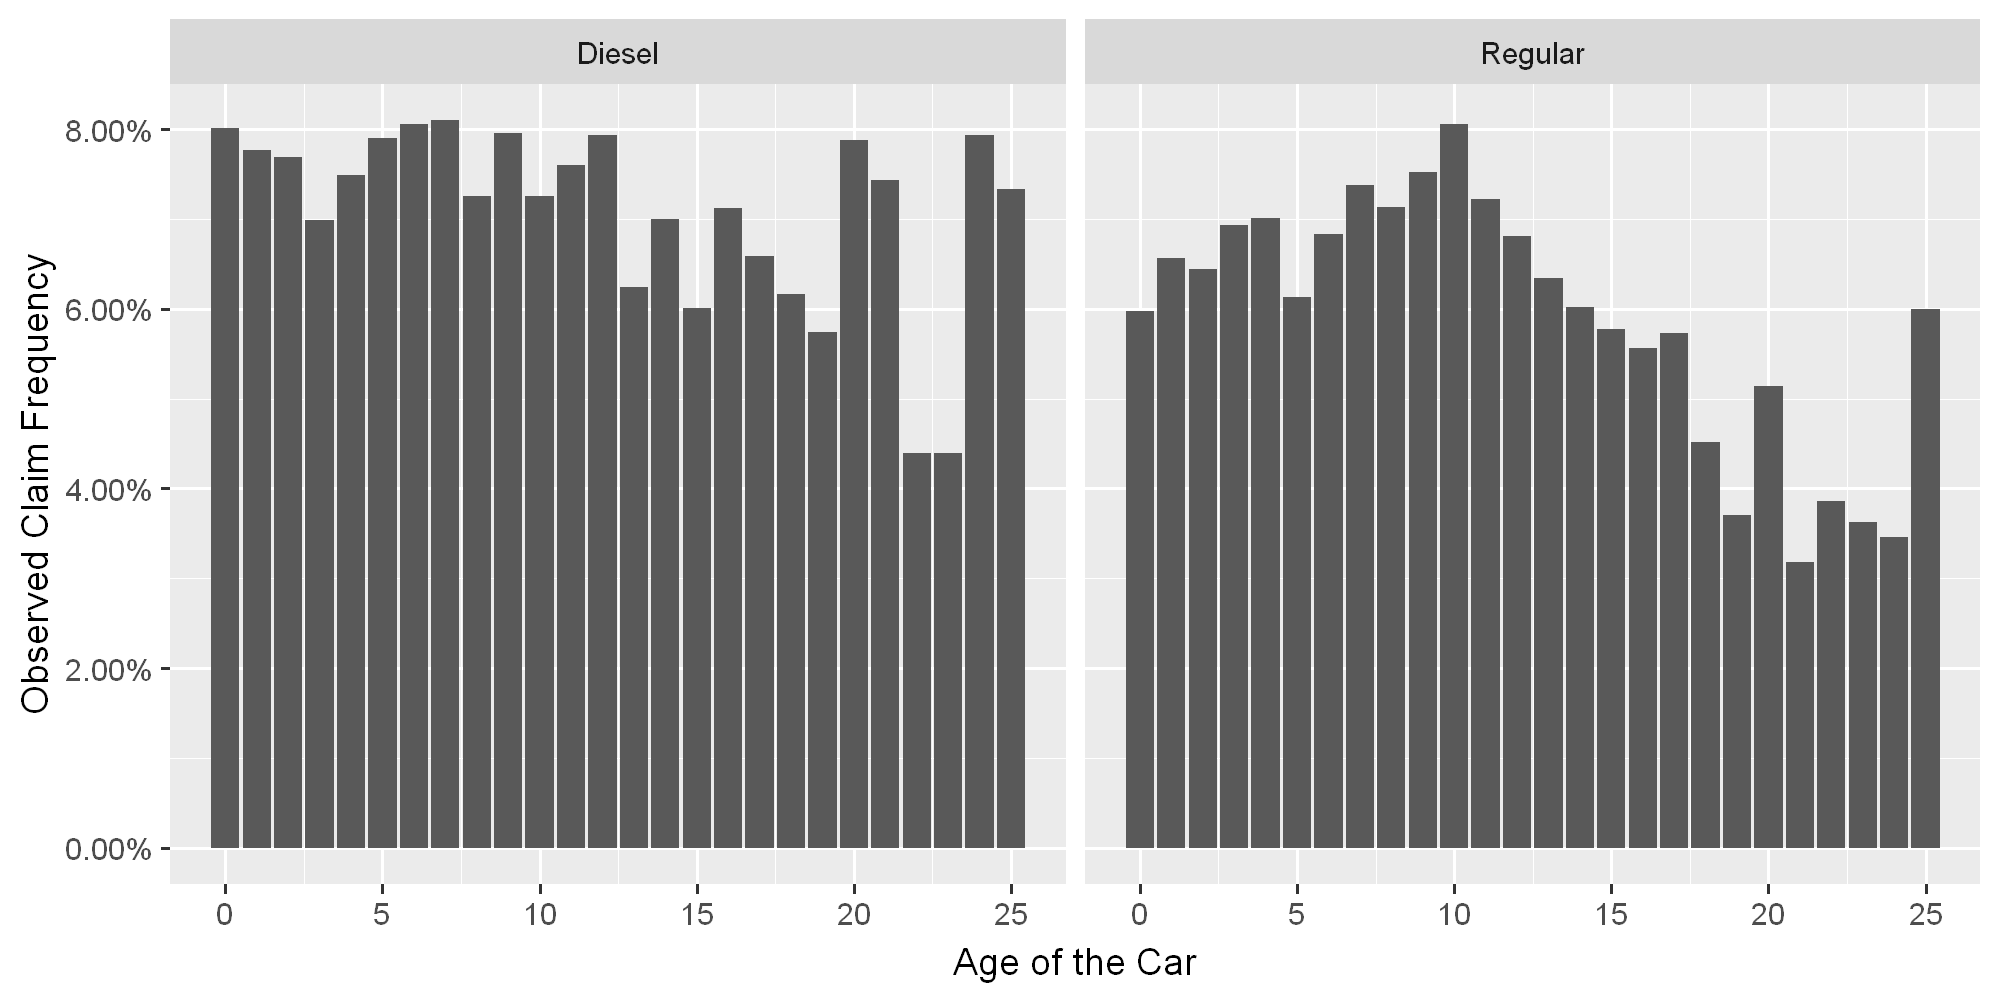

In [146]:
CarAge.Fuel.summary = dataset %>% group_by(CarAge, Gas) %>% 
                      summarise(totalExposure = sum(Exposure),
                                Number.Observations = length(Exposure),
                                Number.Claims = sum(ClaimNb),
                                Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))

ggplot(CarAge.Fuel.summary, aes(x=CarAge, 
                                y=Obs.Claim.Freq)) + 
  facet_wrap(~Gas)+
  geom_bar(stat="identity") + 
  scale_x_continuous(name = "Age of the Car", breaks=seq(0,100,5))+
  scale_y_continuous(name = "Observed Claim Frequency", labels = percent_format(accuracy = 0.01))+
  theme(legend.position = 'none')

### Fuel and Driver Age

We will illustrate another way to show this kind of data, by overlapping both bars.

`summarise()` has grouped output by 'DriverAge'. You can override using the `.groups` argument.


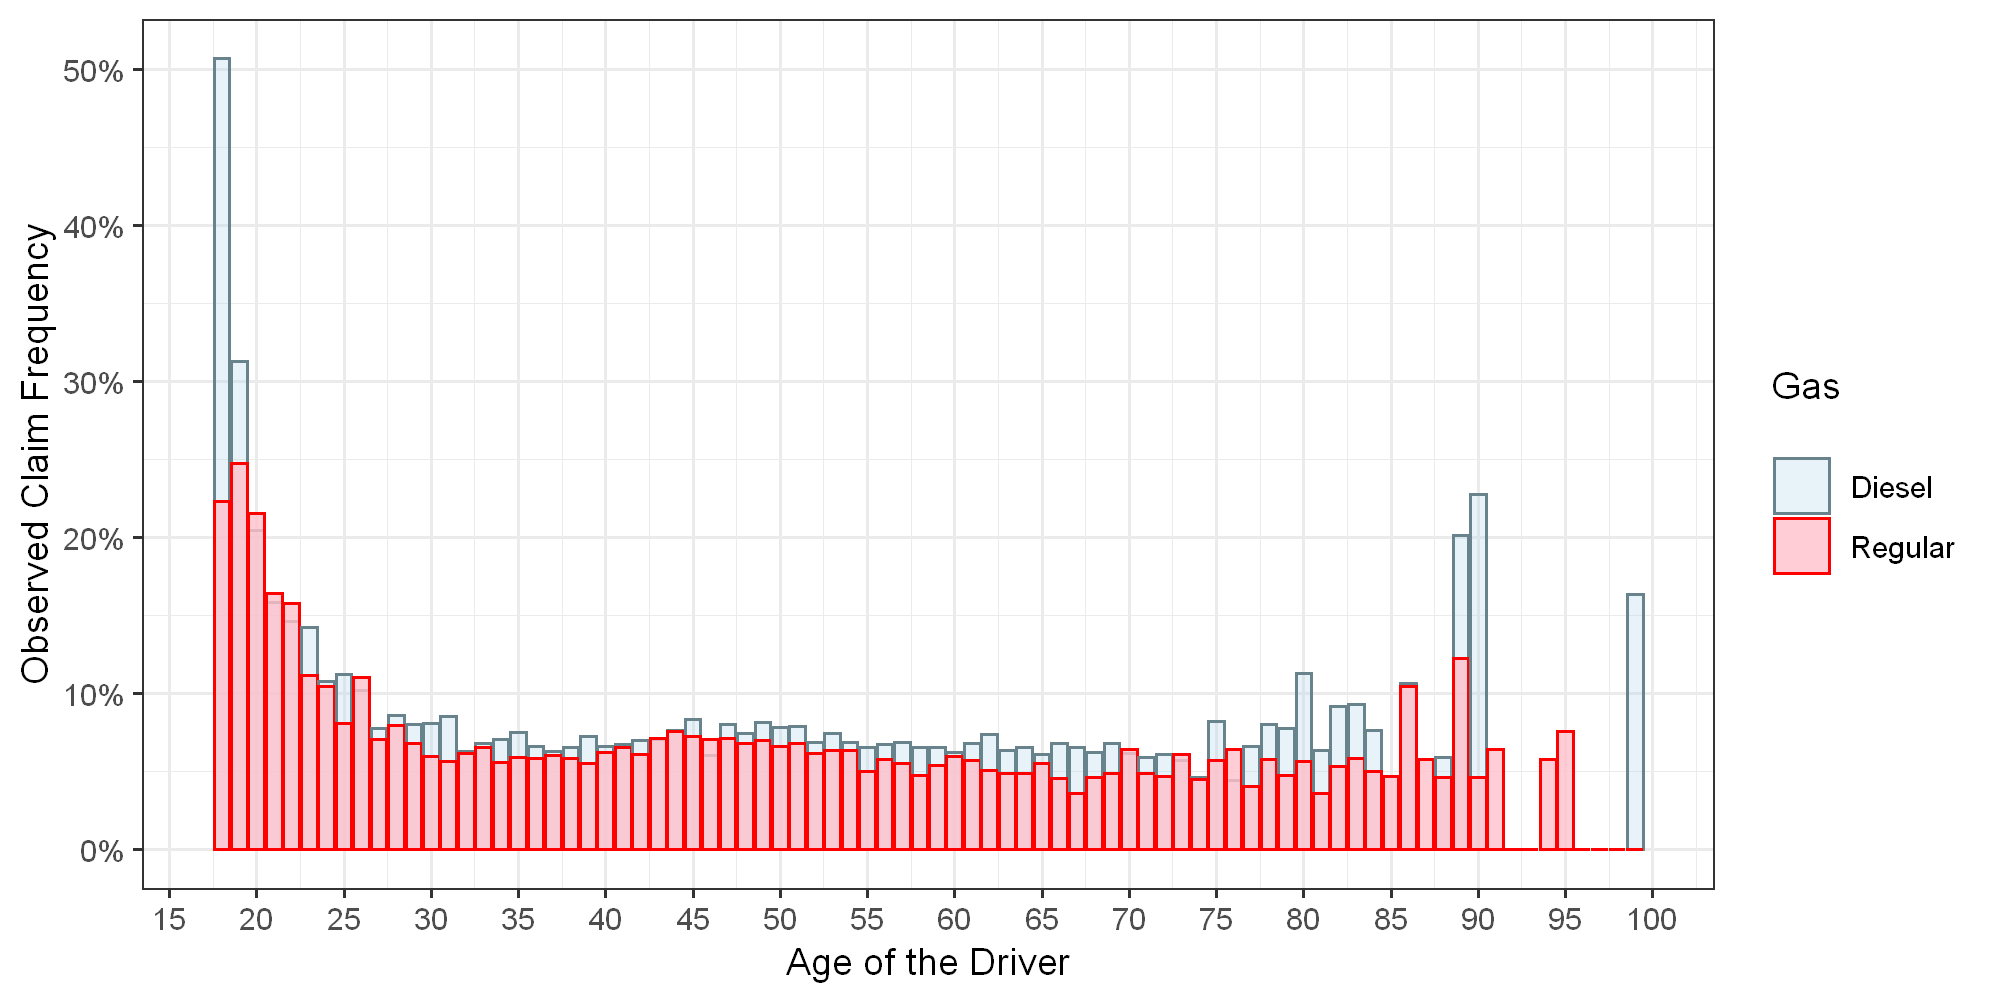

In [147]:
DriverAge.Fuel.summary = dataset %>% group_by(DriverAge, Gas) %>% 
                        summarize(Obs.Claim.Freq = sum(ClaimNb)/sum(Exposure))

ggplot(data=DriverAge.Fuel.summary, aes(x=DriverAge, 
                                        y=Obs.Claim.Freq, 
                                        fill=Gas, 
                                        color=Gas, 
                                        alpha=Gas)) +
  geom_bar(stat="identity", position ="identity") +
  scale_x_continuous(name = "Age of the Driver", breaks = seq(0,100,5))+
  scale_y_continuous(name = "Observed Claim Frequency", labels = label_percent())+
  scale_colour_manual(values=c("lightblue4", "red")) +
  scale_fill_manual(values=c("lightblue", "pink")) +
  scale_alpha_manual(values=c(.3, .8))+
  theme_bw()

# Useful Links

- https://github.com/rstudio/cheatsheets/blob/main/data-transformation.pdf
- https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf